In [1]:
! mkdir -p PLOTS-github

In [2]:
import json
import glob
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

In [3]:
userrepos_lists = {
    "repo_id": [],
    "owner_login": [],
    "owner_id": [],
    "repo_name": [],
    "created_at": [],
    "pushed_at": [],
    "updated_at": [],
    "fork": [],
    "language": [],
    "size": [],
    "description": [],
    "homepage": [],
    "license": [],
    "forks_count": [],
    "open_issues_count": [],
    "stargazers_count": [],
    "watchers_count": [],
}
for filename in glob.glob("/home/jpivarski/storage/data/physicists/forks-of-cmssw-2021-02-24/user-repos/*.json"):
    for repo in json.load(open(filename)):
        userrepos_lists["repo_id"].append(repo["id"])
        userrepos_lists["owner_login"].append(repo["owner"]["login"])
        userrepos_lists["owner_id"].append(repo["owner"]["id"])
        userrepos_lists["repo_name"].append(repo["name"])
        userrepos_lists["created_at"].append(pd.to_datetime(repo["created_at"]))
        userrepos_lists["pushed_at"].append(pd.to_datetime(repo["pushed_at"]))
        userrepos_lists["updated_at"].append(pd.to_datetime(repo["updated_at"]))
        userrepos_lists["fork"].append(repo["fork"])
        userrepos_lists["language"].append(repo["language"])
        userrepos_lists["size"].append(repo["size"])
        userrepos_lists["description"].append(repo["description"])
        userrepos_lists["homepage"].append(repo["homepage"])
        userrepos_lists["license"].append(None if repo["license"] is None else repo["license"]["name"])
        userrepos_lists["forks_count"].append(repo["forks_count"])
        userrepos_lists["open_issues_count"].append(repo["open_issues_count"])
        userrepos_lists["stargazers_count"].append(repo["stargazers_count"])
        userrepos_lists["watchers_count"].append(repo["watchers_count"])

In [4]:
userrepos = pd.DataFrame(userrepos_lists)
userrepos

,repo_id,owner_login,owner_id,repo_name,created_at,pushed_at,updated_at,fork,language,size,description,homepage,license,forks_count,open_issues_count,stargazers_count,watchers_count
0,35404785,helee,6985026,CATTools,2015-05-11 05:49:31+00:00,2015-08-08 11:32:53+00:00,2015-05-11 05:49:31+00:00,True,C++,2788,for cms analysis,None,None,0,0,0,0
1,35404621,helee,6985026,cmssw,2015-05-11 05:45:33+00:00,2015-12-04 09:13:52+00:00,2015-05-11 05:48:44+00:00,True,C++,834853,CMS Offline Software,http://cms-sw.github.io/,None,0,0,0,0
2,132709357,helee,6985026,EgammaAnalysis-TnPTreeProducer,2018-05-09 06:06:02+00:00,2021-01-12 15:40:14+00:00,2018-05-09 06:06:04+00:00,True,Python,41157,TnP package for EGM,None,None,1,0,0,0
3,156663899,helee,6985026,egm_tnp_analysis,2018-11-08 06:59:13+00:00,2018-10-22 15:26:44+00:00,2018-11-08 06:59:15+00:00,True,Python,273,package to analyse egm tnp trees,,None,1,0,0,0
4,131195399,helee,6985026,GEM_QC_SW,2018-04-26 18:26:31+00:00,2018-05-07 17:33:22+00:00,2018-05-07 08:33:30+00:00,True,C,192,None,None,None,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35903,16122368,hkaushalya,5091507,haddws,2014-01-21 23:24:01+00:00,2014-02-15 16:25:46+00:00,2019-08-13 11:49:27+00:00,False,C++,192,hadd with weights (or better hadd). Adds histo...,None,GNU General Public License v3.0,5,0,5,5
35904,16212173,hkaushalya,5091507,hadoop-R,2014-01-24 17:56:31+00:00,2012-10-17 21:40:49+00:00,2014-01-24 17:56:32+00:00,True,R,143,Example code for running R on Hadoop,,None,0,0,0,0
35905,19552028,hkaushalya,5091507,hkaushalya.github.io,2014-05-07 22:07:39+00:00,2014-05-07 22:17:07+00:00,2014-05-07 22:17:08+00:00,False,None,108,My first GitHub page,None,None,0,0,0,0
35906,284286671,msedghi-1305,68026516,cmssw,2020-08-01 15:28:47+00:00,2020-08-03 15:02:21+00:00,2020-08-03 15:02:29+00:00,True,C++,1126925,CMS Offline Software,http://cms-sw.github.io/,Apache License 2.0,0,0,0,0


In [5]:
users_with_cmssw = userrepos[(userrepos["repo_name"] == "cmssw") & (userrepos["fork"])]["owner_login"]
userrepos_cut = userrepos[userrepos["owner_login"].isin(users_with_cmssw)]
userrepos_cut = userrepos_cut[~userrepos_cut["fork"]]

userrepos_cut["Python"] = userrepos_cut["language"] == "Python"
userrepos_cut["Jupyter"] = userrepos_cut["language"] == "Jupyter Notebook"
userrepos_cut["C and C++"] = (userrepos_cut["language"] == "C") | (userrepos_cut["language"] == "C++")

In [6]:
def smooth(series, colors, ax):
    for s, c in zip(series, colors):
        s[(pd.to_datetime("2013-01-01") < s.index.values) & (s.index.values < pd.to_datetime("2021-02-01"))].rolling(
            4, center=True, win_type="gaussian"
        ).mean(std=2).plot(color=c, ax=ax)

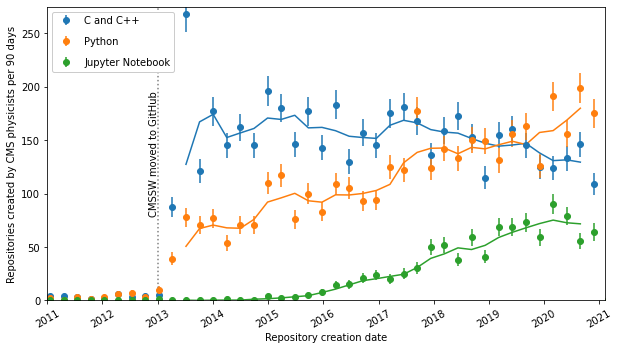

In [7]:
physicists = userrepos_cut.copy()
physicists.index = physicists["created_at"]
bylanguage = physicists[["C and C++", "Python", "Jupyter"]].resample("90D", origin=userrepos_cut["created_at"].max()).sum()
ax = bylanguage.plot(yerr=np.sqrt(bylanguage), marker="o", ls="none", rot=0, figsize=(10, 6))
smooth([bylanguage["C and C++"], bylanguage["Python"], bylanguage["Jupyter"]], ["tab:blue", "tab:orange", "tab:green"], ax)
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 0.5*275, "CMSSW moved to GitHub", rotation=90, va="center")
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("Repositories created by CMS physicists per 90 days")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2021-02-10"))
ax.set_ylim(0, 275)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], [
    "C and C++", "Python", "Jupyter Notebook",
], loc="upper left", labelspacing=1.1, framealpha=1)
ax.get_figure().savefig("PLOTS-github/gihub-repo-language.svg")
ax.get_figure().savefig("PLOTS-github/gihub-repo-language.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-repo-language.png")

In [8]:
userrepos_cut2 = userrepos[
    userrepos["owner_login"].isin(users_with_cmssw) &
    ~userrepos["fork"]
].copy()
userrepos_cut2["C and C++"] = (userrepos_cut2["language"] == "C") | (userrepos_cut2["language"] == "C++")
userrepos_cut2["Python"] = userrepos_cut2["language"] == "Python"
userrepos_cut2["Jupyter"] = userrepos_cut2["language"] == "Jupyter Notebook"
userrepos_cut2 = userrepos_cut2.groupby([
    pd.Grouper(key="owner_login"),
    pd.Grouper(key="created_at", freq="90D", origin=userrepos_cut["created_at"].max()),
])[["C and C++", "Python", "Jupyter"]].sum()
sum1 = userrepos_cut2.groupby(level=1).count()
sumx = userrepos_cut2.groupby(level=1).sum()
sumxx = (userrepos_cut2**2).groupby(level=1).sum()
y = (sumx / sum1)
yerr = np.sqrt((sumxx / sum1) - (sumx / sum1)**2) / np.sqrt(sum1)

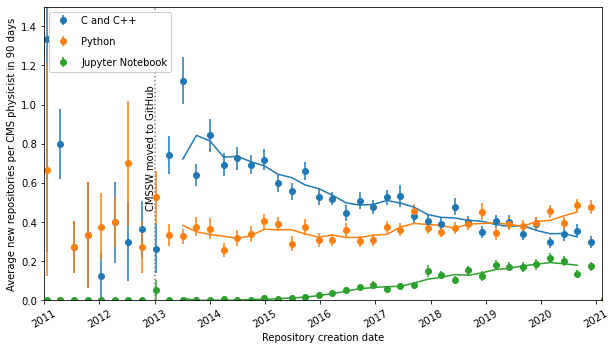

In [9]:
ax = y.plot(yerr=yerr, marker="o", ls="none", rot=0, figsize=(10, 6))
smooth([y["C and C++"], y["Python"], y["Jupyter"]], ["tab:blue", "tab:orange", "tab:green"], ax)
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 1.1, "CMSSW moved to GitHub", rotation=90, va="top")
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("Average new repositories per CMS physicist in 90 days")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2021-02-10"))
ax.set_ylim(0, 1.5)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], [
    "C and C++", "Python", "Jupyter Notebook",
], loc="upper left", labelspacing=1.1, framealpha=1)
ax.get_figure().savefig("PLOTS-github/gihub-repo-language-byuser.svg")
ax.get_figure().savefig("PLOTS-github/gihub-repo-language-byuser.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-repo-language-byuser.png")

In [10]:
def get_search_vstime(directory, wildcard="*", parent="forks-of-cmssw-2021-02-24/searches"):
    search_lists = {
        "repo_id": [],
        "owner_login": [],
        "owner_id": [],
        "repo_name": [],
        "path": [],
        "fork": [],
    }

    for filename in glob.glob("/home/jpivarski/storage/data/physicists/{}/{}/{}.json".format(parent, directory, wildcard)):
        jsondata = json.load(open(filename))
        if jsondata.get("message") != "Validation Failed":
            for match in jsondata["items"]:
                search_lists["repo_id"].append(match["repository"]["id"])
                search_lists["owner_login"].append(match["repository"]["owner"]["login"])
                search_lists["owner_id"].append(match["repository"]["owner"]["id"])
                search_lists["repo_name"].append(match["repository"]["name"])
                search_lists["path"].append(match["path"])
                search_lists["fork"].append(match["repository"]["fork"])

    search = pd.DataFrame(search_lists)
    search.set_index(["owner_login", "repo_name"], inplace=True, drop=False)

    search_vstime = pd.merge(search, userrepos.set_index(["owner_login", "repo_name"]), left_index=True, right_index=True)
    search_vstime = search_vstime[~search_vstime["fork_y"]]
    search_vstime.set_index(["owner_login", "repo_name", "created_at"], inplace=True)
    search_vstime = search_vstime.groupby(level=2).max()["repo_id_x"] != 0
    search_vstime = search_vstime.resample("90D", origin=userrepos_cut["created_at"].max()).sum()
    return search_vstime

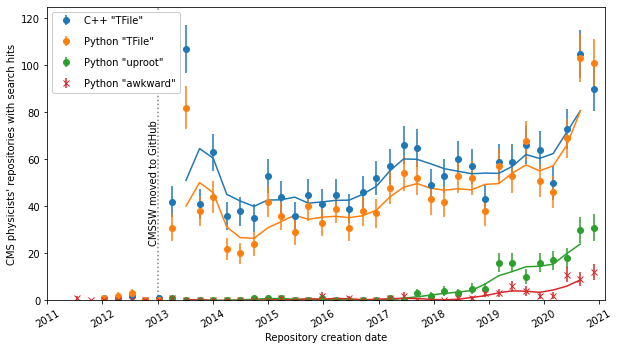

In [11]:
search_cpp_tfile = get_search_vstime("cpp-tfile")
search_python_tfile = get_search_vstime("python-tfile")
search_uproot_vstime = get_search_vstime("python-uproot")
search_awkward_vstime = get_search_vstime("python-awkward")

ax = search_cpp_tfile.plot(yerr=np.sqrt(search_cpp_tfile), marker="o", ls="none", rot=0, figsize=(10, 6))
search_python_tfile.plot(yerr=np.sqrt(search_python_tfile), marker="o", ls="none", rot=0, ax=ax)
search_uproot_vstime.plot(yerr=np.sqrt(search_uproot_vstime), marker="o", ls="none", rot=0, ax=ax)
search_awkward_vstime.plot(yerr=np.sqrt(search_awkward_vstime), marker="x", ls="none", rot=0, ax=ax)
smooth([search_cpp_tfile, search_python_tfile, search_uproot_vstime, search_awkward_vstime], ["tab:blue", "tab:orange", "tab:green", "tab:red"], ax)
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("CMS physicists' repositories with search hits")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2021-02-10"))
ax.set_ylim(0, 125)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[4:], [
    "C++ \"TFile\"", "Python \"TFile\"", "Python \"uproot\"", "Python \"awkward\"",
], loc="upper left", labelspacing=1.1, framealpha=1)
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 0.4*125, "CMSSW moved to GitHub", rotation=90, va="center")
ax.get_figure().savefig("PLOTS-github/gihub-search-tfile-uproot-awkward.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-tfile-uproot-awkward.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-tfile-uproot-awkward.png")

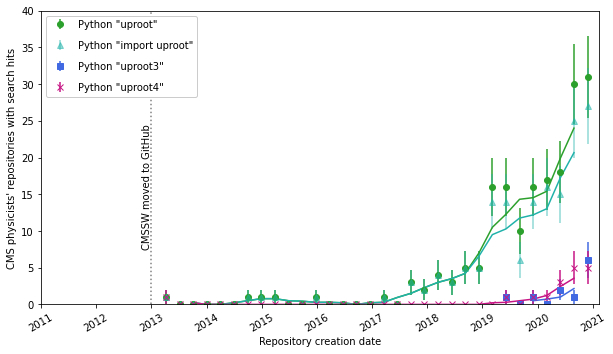

In [12]:
search_uproot_vstime = get_search_vstime("python-uproot")
search_import_uproot_vstime = get_search_vstime("python-import-uproot")
search_uproot3_vstime = get_search_vstime("python-uproot3")
search_uproot4_vstime = get_search_vstime("python-uproot4")

ax = search_uproot_vstime.plot(yerr=np.sqrt(search_uproot_vstime), marker="o", c="tab:green", ls="none", rot=0, figsize=(10, 6))
search_import_uproot_vstime.plot(yerr=np.sqrt(search_import_uproot_vstime), marker="^", c="lightseagreen", alpha=0.5, ls="none", rot=0, ax=ax)
search_uproot3_vstime.plot(yerr=np.sqrt(search_uproot3_vstime), marker="s", c="royalblue", ls="none", rot=0, ax=ax)
search_uproot4_vstime.plot(yerr=np.sqrt(search_uproot4_vstime), marker="x", c="mediumvioletred", ls="none", rot=0, ax=ax)
smooth([search_uproot_vstime, search_import_uproot_vstime, search_uproot3_vstime, search_uproot4_vstime], ["tab:green", "lightseagreen", "royalblue", "mediumvioletred"], ax)
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("CMS physicists' repositories with search hits")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2021-02-10"))
ax.set_ylim(0, 40)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[4:], [
    "Python \"uproot\"", "Python \"import uproot\"", "Python \"uproot3\"", "Python \"uproot4\"",
], loc="upper left", labelspacing=1.1, framealpha=1)
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 0.4*40, "CMSSW moved to GitHub", rotation=90, va="center")
ax.get_figure().savefig("PLOTS-github/gihub-search-uproot-variations.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-uproot-variations.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-uproot-variations.png")

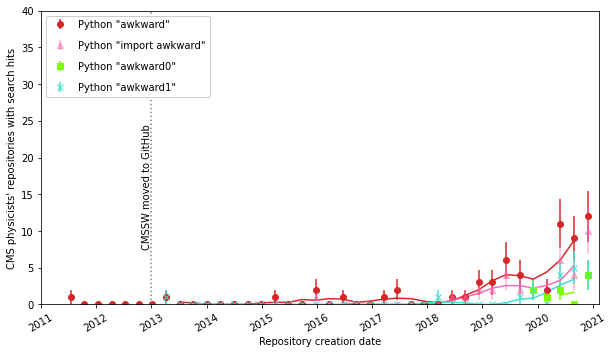

In [13]:
search_awkward_vstime = get_search_vstime("python-awkward")
search_import_awkward_vstime = get_search_vstime("python-import-awkward")
search_awkward0_vstime = get_search_vstime("python-awkward0")
search_awkward1_vstime = get_search_vstime("python-awkward1")

ax = search_awkward_vstime.plot(yerr=np.sqrt(search_awkward_vstime), marker="o", c="tab:red", ls="none", rot=0, figsize=(10, 6))
search_import_awkward_vstime.plot(yerr=np.sqrt(search_import_awkward_vstime), marker="^", c="hotpink", alpha=0.5, ls="none", rot=0, ax=ax)
search_awkward0_vstime.plot(yerr=np.sqrt(search_awkward0_vstime), marker="s", c="lawngreen", ls="none", rot=0, ax=ax)
search_awkward1_vstime.plot(yerr=np.sqrt(search_awkward1_vstime), marker="x", c="turquoise", ls="none", rot=0, ax=ax)
smooth([search_awkward_vstime, search_import_awkward_vstime, search_awkward0_vstime, search_awkward1_vstime], ["tab:red", "hotpink", "lawngreen", "turquoise"], ax)
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("CMS physicists' repositories with search hits")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2021-02-10"))
ax.set_ylim(0, 40)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[4:], [
    "Python \"awkward\"", "Python \"import awkward\"", "Python \"awkward0\"", "Python \"awkward1\"",
], loc="upper left", labelspacing=1.1, framealpha=1)
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 0.4*40, "CMSSW moved to GitHub", rotation=90, va="center")
ax.get_figure().savefig("PLOTS-github/gihub-search-awkward-variations.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-awkward-variations.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-awkward-variations.png")

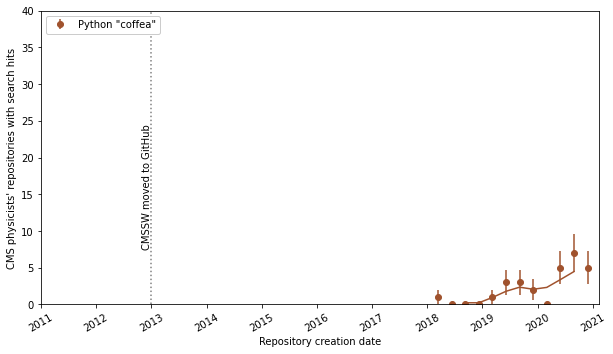

In [14]:
search_coffea_vstime = get_search_vstime("python-coffea")

ax = search_coffea_vstime.plot(yerr=np.sqrt(search_coffea_vstime), marker="o", c="sienna", ls="none", rot=0, figsize=(10, 6))
smooth([search_coffea_vstime], ["sienna"], ax)
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("CMS physicists' repositories with search hits")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2021-02-10"))
ax.set_ylim(0, 40)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[1:], [
    "Python \"coffea\"",
], loc="upper left", labelspacing=1.1, framealpha=1)
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 0.4*40, "CMSSW moved to GitHub", rotation=90, va="center")
ax.get_figure().savefig("PLOTS-github/gihub-search-coffea.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-coffea.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-coffea.png")

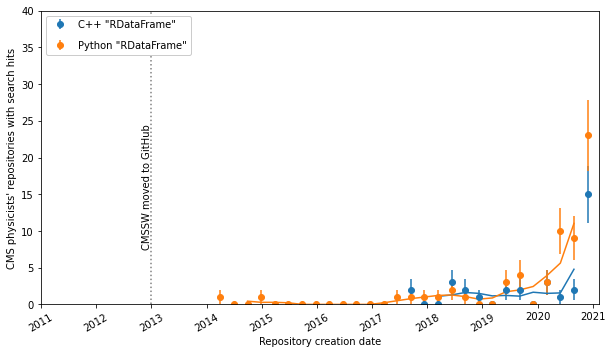

In [15]:
search_cpp_rdataframe_vstime = get_search_vstime("cpp-rdataframe")
search_python_rdataframe_vstime = get_search_vstime("python-rdataframe")

ax = search_cpp_rdataframe_vstime.plot(yerr=np.sqrt(search_cpp_rdataframe_vstime), marker="o", ls="none", rot=0, figsize=(10, 6))
search_python_rdataframe_vstime.plot(yerr=np.sqrt(search_python_rdataframe_vstime), marker="o", ls="none", rot=0, ax=ax)
smooth([search_cpp_rdataframe_vstime, search_python_rdataframe_vstime], ["tab:blue", "tab:orange"], ax)
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("CMS physicists' repositories with search hits")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2021-02-10"))
ax.set_ylim(0, 40)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[2:], [
    "C++ \"RDataFrame\"", "Python \"RDataFrame\"",
], loc="upper left", labelspacing=1.1, framealpha=1)
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 0.4*40, "CMSSW moved to GitHub", rotation=90, va="center")
ax.get_figure().savefig("PLOTS-github/gihub-search-rdataframe.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-rdataframe.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-rdataframe.png")

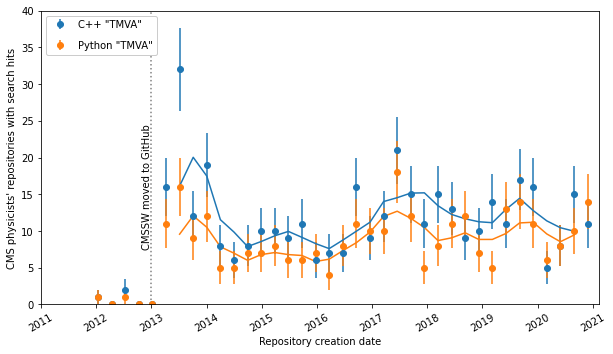

In [16]:
search_cpp_tmva_vstime = get_search_vstime("cpp-tmva")
search_python_tmva_vstime = get_search_vstime("python-tmva")

ax = search_cpp_tmva_vstime.plot(yerr=np.sqrt(search_cpp_tmva_vstime), marker="o", ls="none", rot=0, figsize=(10, 6))
search_python_tmva_vstime.plot(yerr=np.sqrt(search_python_tmva_vstime), marker="o", ls="none", rot=0, ax=ax)
smooth([search_cpp_tmva_vstime, search_python_tmva_vstime], ["tab:blue", "tab:orange"], ax)
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("CMS physicists' repositories with search hits")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2021-02-10"))
ax.set_ylim(0, 40)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[2:], [
    "C++ \"TMVA\"", "Python \"TMVA\"",
], loc="upper left", labelspacing=1.1, framealpha=1)
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 0.4*40, "CMSSW moved to GitHub", rotation=90, va="center")
ax.get_figure().savefig("PLOTS-github/gihub-search-tmva.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-tmva.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-tmva.png")

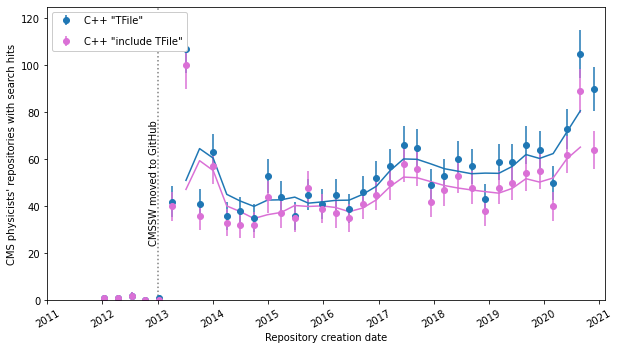

In [17]:
search_cpp_tfile = get_search_vstime("cpp-tfile")
search_cpp_include_tfile = get_search_vstime("cpp-include-tfile")

ax = search_cpp_tfile.plot(yerr=np.sqrt(search_cpp_tfile), marker="o", ls="none", rot=0, figsize=(10, 6))
search_cpp_include_tfile.plot(yerr=np.sqrt(search_cpp_include_tfile), marker="o", color="orchid", ls="none", rot=0, ax=ax)
smooth([search_cpp_tfile, search_cpp_include_tfile], ["tab:blue", "orchid"], ax)
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("CMS physicists' repositories with search hits")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2021-02-10"))
ax.set_ylim(0, 125)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[2:], [
    "C++ \"TFile\"", "C++ \"include TFile\"",
], loc="upper left", labelspacing=1.1, framealpha=1)
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 0.4*125, "CMSSW moved to GitHub", rotation=90, va="center")
ax.get_figure().savefig("PLOTS-github/gihub-search-cpp-tfile-variations.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-cpp-tfile-variations.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-cpp-tfile-variations.png")

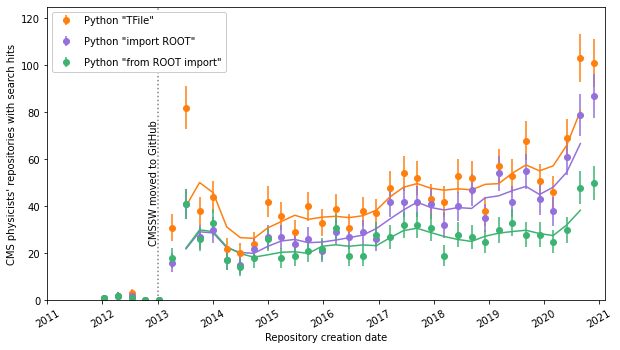

In [18]:
search_python_tfile = get_search_vstime("python-tfile")
search_python_import_root = get_search_vstime("python-import-root")
search_python_from_root_import = get_search_vstime("python-from-root-import")

ax = search_python_tfile.plot(yerr=np.sqrt(search_python_tfile), marker="o", color="tab:orange", ls="none", rot=0, figsize=(10, 6))
search_python_import_root.plot(yerr=np.sqrt(search_python_import_root), marker="o", color="mediumpurple", ls="none", rot=0, ax=ax)
search_python_from_root_import.plot(yerr=np.sqrt(search_python_from_root_import), marker="o", color="mediumseagreen", ls="none", rot=0, ax=ax)
smooth([search_python_tfile, search_python_import_root, search_python_from_root_import], ["tab:orange", "mediumpurple", "mediumseagreen"], ax)
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("CMS physicists' repositories with search hits")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2021-02-10"))
ax.set_ylim(0, 125)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], [
    "Python \"TFile\"", "Python \"import ROOT\"", "Python \"from ROOT import\"",
], loc="upper left", labelspacing=1.1, framealpha=1)
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 0.4*125, "CMSSW moved to GitHub", rotation=90, va="center")
ax.get_figure().savefig("PLOTS-github/gihub-search-python-root-variations.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-python-root-variations.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-python-root-variations.png")

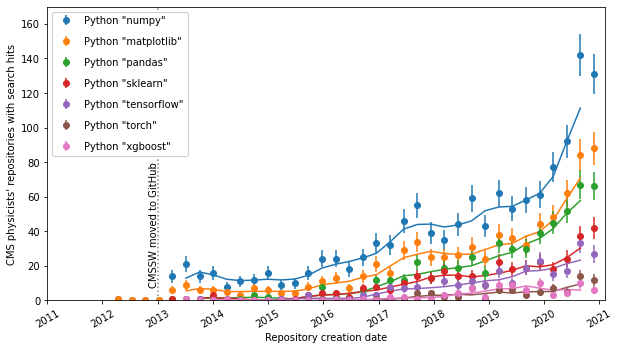

In [19]:
search_numpy = get_search_vstime("python-numpy")
search_matplotlib = get_search_vstime("python-matplotlib")
search_pandas = get_search_vstime("python-pandas")
search_sklearn = get_search_vstime("python-sklearn")
search_tensorflow = get_search_vstime("python-tensorflow")
search_torch = get_search_vstime("python-torch")
search_xgboost = get_search_vstime("python-xgboost")

ax = search_numpy.plot(yerr=np.sqrt(search_numpy), marker="o", ls="none", rot=0, figsize=(10, 6))
search_matplotlib.plot(yerr=np.sqrt(search_matplotlib), marker="o", ls="none", rot=0, ax=ax)
search_pandas.plot(yerr=np.sqrt(search_pandas), marker="o", ls="none", rot=0, ax=ax)
search_sklearn.plot(yerr=np.sqrt(search_sklearn), marker="o", ls="none", rot=0, ax=ax)
search_tensorflow.plot(yerr=np.sqrt(search_tensorflow), marker="o", ls="none", rot=0, ax=ax)
search_torch.plot(yerr=np.sqrt(search_torch), marker="o", ls="none", rot=0, ax=ax)
search_xgboost.plot(yerr=np.sqrt(search_xgboost), marker="o", ls="none", rot=0, ax=ax)
smooth([search_numpy, search_matplotlib, search_pandas, search_sklearn, search_tensorflow, search_torch, search_xgboost],
       plt.rcParams["axes.prop_cycle"].by_key()["color"] * 2, ax)
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("CMS physicists' repositories with search hits")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2021-02-10"))
ax.set_ylim(0, 170)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[7:], [
    "Python \"numpy\"", "Python \"matplotlib\"", "Python \"pandas\"", "Python \"sklearn\"", "Python \"tensorflow\"", "Python \"torch\"", "Python \"xgboost\"",
], loc="upper left", labelspacing=1.1, framealpha=1)
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 0.35*125, "CMSSW moved to GitHub", rotation=90, va="center")
ax.get_figure().savefig("PLOTS-github/gihub-search-python-ecosystem.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-python-ecosystem.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-python-ecosystem.png")

In [20]:
def get_search_for_correlation(directory, name, byrepo=False, since=None):
    search_lists = {
        "repo_id": [],
        "owner_login": [],
        "owner_id": [],
        "repo_name": [],
        "path": [],
        "fork": [],
    }

    for filename in glob.glob("/home/jpivarski/storage/data/physicists/forks-of-cmssw-2021-02-24/searches/{}/*.json".format(directory)):
        jsondata = json.load(open(filename))
        if jsondata.get("message") != "Validation Failed":
            for match in jsondata["items"]:
                search_lists["repo_id"].append(match["repository"]["id"])
                search_lists["owner_login"].append(match["repository"]["owner"]["login"])
                search_lists["owner_id"].append(match["repository"]["owner"]["id"])
                search_lists["repo_name"].append(match["repository"]["name"])
                search_lists["path"].append(match["path"])
                search_lists["fork"].append(match["repository"]["fork"])

    search = pd.DataFrame(search_lists)
    search.set_index(["owner_login", "repo_name"], inplace=True)
    search = pd.merge(search, userrepos.set_index(["owner_login", "repo_name"]), left_index=True, right_index=True)
    search = search[~search["fork_y"]]
    if since is not None:
        search = search[search["created_at"].dt.date > pd.to_datetime(since)]
    search.reset_index(inplace=True)
    if byrepo:
        search = search.groupby(["owner_login", "repo_name"]).first()
    else:
        search.set_index(["owner_login", "repo_name", "path"], inplace=True, drop=False)
    search[name] = True
    return search[name]

In [21]:
search_dfs = []
search_dfs.append(get_search_for_correlation("cpp-tfile", "C++ \"TFile\""))
search_dfs.append(get_search_for_correlation("cpp-include-tfile", "C++ \"include TFile\""))
search_dfs.append(get_search_for_correlation("python-tfile", "Python \"TFile\""))
search_dfs.append(get_search_for_correlation("python-import-root", "Python \"import ROOT\""))
search_dfs.append(get_search_for_correlation("python-from-root-import", "Python \"from ROOT import\""))
search_dfs.append(get_search_for_correlation("cpp-tmva", "C++ \"TMVA\""))
search_dfs.append(get_search_for_correlation("python-tmva", "Python \"TMVA\""))
search_dfs.append(get_search_for_correlation("cpp-rdataframe", "C++ \"RDataFrame\""))
search_dfs.append(get_search_for_correlation("python-rdataframe", "Python \"RDataFrame\""))
search_dfs.append(get_search_for_correlation("python-uproot", "Python \"uproot\""))
search_dfs.append(get_search_for_correlation("python-import-uproot", "Python \"import uproot\""))
search_dfs.append(get_search_for_correlation("python-uproot3", "Python \"uproot3\""))
search_dfs.append(get_search_for_correlation("python-uproot4", "Python \"uproot4\""))
search_dfs.append(get_search_for_correlation("python-awkward", "Python \"awkward\""))
search_dfs.append(get_search_for_correlation("python-import-awkward", "Python \"import awkward\""))
search_dfs.append(get_search_for_correlation("python-awkward0", "Python \"awkward0\""))
search_dfs.append(get_search_for_correlation("python-awkward1", "Python \"awkward1\""))
search_dfs.append(get_search_for_correlation("python-coffea", "Python \"coffea\""))
search_dfs.append(get_search_for_correlation("python-numpy", "Python \"numpy\""))
search_dfs.append(get_search_for_correlation("python-matplotlib", "Python \"matplotlib\""))
search_dfs.append(get_search_for_correlation("python-pandas", "Python \"pandas\""))
search_dfs.append(get_search_for_correlation("python-sklearn", "Python \"sklearn\""))
search_dfs.append(get_search_for_correlation("python-tensorflow", "Python \"tensorflow\""))
search_dfs.append(get_search_for_correlation("python-torch", "Python \"torch\""))
search_dfs.append(get_search_for_correlation("python-xgboost", "Python \"xgboost\""))

In [22]:
search_df = None
for df in search_dfs:
    if search_df is None:
        search_df = df
    else:
        search_df = pd.merge(search_df, df, how="outer", left_index=True, right_index=True)

search_df.fillna(False, inplace=True)

In [23]:
correlation = search_df.corr(lambda x, y: (x * y).sum() / len(x))
correlation

,"C++ ""TFile""","C++ ""include TFile""","Python ""TFile""","Python ""import ROOT""","Python ""from ROOT import""","C++ ""TMVA""","Python ""TMVA""","C++ ""RDataFrame""","Python ""RDataFrame""","Python ""uproot""",...,"Python ""awkward0""","Python ""awkward1""","Python ""coffea""","Python ""numpy""","Python ""matplotlib""","Python ""pandas""","Python ""sklearn""","Python ""tensorflow""","Python ""torch""","Python ""xgboost"""
"C++ ""TFile""",1.000000,0.181636,0.000000,0.000000,0.000000,0.014929,0.000000,0.000143,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"C++ ""include TFile""",0.181636,1.000000,0.000000,0.000000,0.000000,0.009232,0.000000,0.000119,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"Python ""TFile""",0.000000,0.000000,1.000000,0.061924,0.047162,0.000000,0.004072,0.000000,0.000619,0.000708,...,0.000006,0.000012,0.000065,0.014459,0.002720,0.002351,0.001256,0.000821,0.000018,0.000232
"Python ""import ROOT""",0.000000,0.000000,0.061924,1.000000,0.033055,0.000000,0.002661,0.000000,0.000952,0.001113,...,0.000000,0.000006,0.000060,0.019751,0.005298,0.003941,0.002250,0.000929,0.000024,0.000607
"Python ""from ROOT import""",0.000000,0.000000,0.047162,0.033055,1.000000,0.000000,0.002583,0.000000,0.000226,0.000244,...,0.000000,0.000006,0.000024,0.011090,0.002208,0.001506,0.001131,0.000601,0.000000,0.000179
"C++ ""TMVA""",0.014929,0.009232,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"Python ""TMVA""",0.000000,0.000000,0.004072,0.002661,0.002583,0.000000,1.000000,0.000000,0.000060,0.000095,...,0.000000,0.000000,0.000000,0.001583,0.000476,0.000476,0.000482,0.000065,0.000000,0.000304
"C++ ""RDataFrame""",0.000143,0.000119,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"Python ""RDataFrame""",0.000000,0.000000,0.000619,0.000952,0.000226,0.000000,0.000060,0.000000,1.000000,0.000060,...,0.000000,0.000000,0.000000,0.000387,0.000071,0.000119,0.000077,0.000000,0.000000,0.000083
"Python ""uproot""",0.000000,0.000000,0.000708,0.001113,0.000244,0.000000,0.000095,0.000000,0.000060,1.000000,...,0.000095,0.000167,0.000637,0.003851,0.002262,0.002637,0.000911,0.000685,0.000077,0.000304


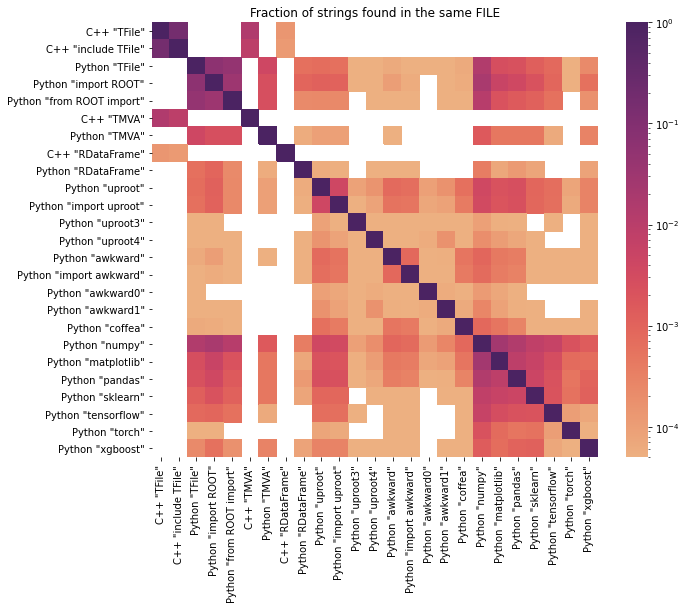

In [24]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    correlation,
    xticklabels=correlation.columns,
    yticklabels=correlation.columns,
    norm=matplotlib.colors.LogNorm(0.00005, 1),
    cmap=sns.color_palette("flare", as_cmap=True),
)
ax.set_title("Fraction of strings found in the same FILE")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-matrix-byfile.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-matrix-byfile.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-matrix-byfile.png")

In [25]:
def plot_single(df, strings, which, since=None):
    cut, label = None, None
    for s in strings:
        if cut is None:
            cut, label = df[s], s
        else:
            cut, label = cut | df[s], label + " OR " + s.replace("C++ ", "").replace("Python ", "")
    ax = df[cut].sum(axis=0)[::-1].plot.barh(figsize=(3, 6))    # logx=True, 
    if since is None:
        since = ""
    else:
        since = " since " + since
    plt.xlabel("#{} with a given string{}".format(which, since))
    plt.title("{} with {}".format(which, label))
#     _, high = plt.xlim()
#     plt.xlim(0.1, high)
    return ax

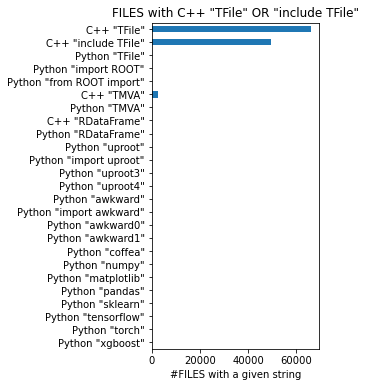

In [26]:
ax = plot_single(search_df, ["C++ \"TFile\"", "C++ \"include TFile\""], "FILES")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-cpp-tfile-byfile.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-cpp-tfile-byfile.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-cpp-tfile-byfile.png")

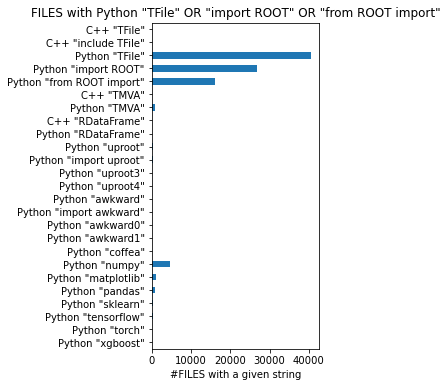

In [27]:
ax = plot_single(search_df, ["Python \"TFile\"", "Python \"import ROOT\"", "Python \"from ROOT import\""], "FILES")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-root-byfile.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-root-byfile.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-root-byfile.png")

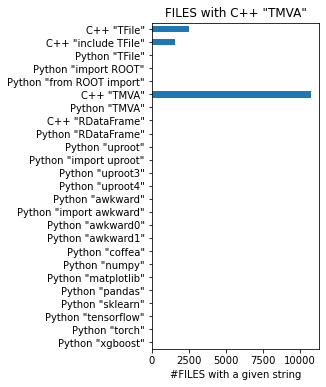

In [28]:
ax = plot_single(search_df, ["C++ \"TMVA\""], "FILES")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-cpp-tmva-byfile.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-cpp-tmva-byfile.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-cpp-tmva-byfile.png")

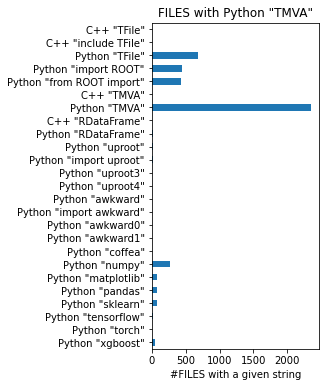

In [29]:
ax = plot_single(search_df, ["Python \"TMVA\""], "FILES")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-tmva-byfile.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-tmva-byfile.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-tmva-byfile.png")

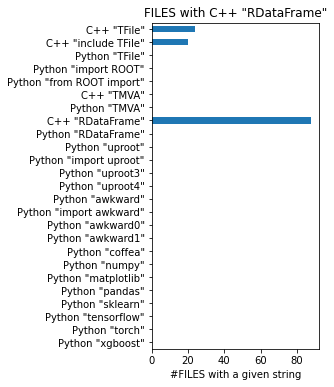

In [30]:
ax = plot_single(search_df, ["C++ \"RDataFrame\""], "FILES")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-cpp-rdataframe-byfile.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-cpp-rdataframe-byfile.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-cpp-rdataframe-byfile.png")

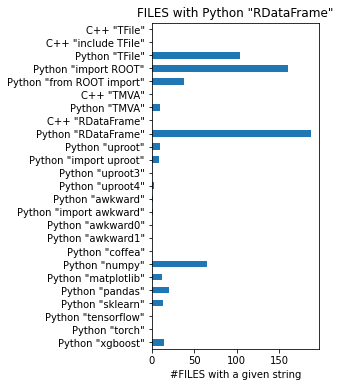

In [31]:
ax = plot_single(search_df, ["Python \"RDataFrame\""], "FILES")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-rdataframe-byfile.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-rdataframe-byfile.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-rdataframe-byfile.png")

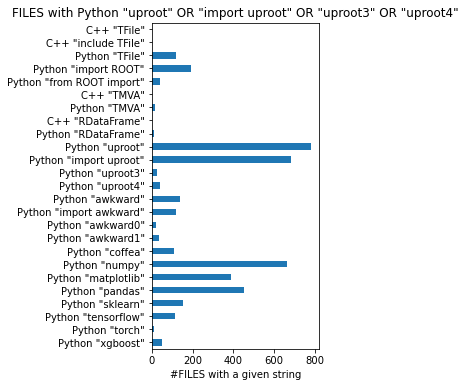

In [32]:
ax = plot_single(search_df, ["Python \"uproot\"", "Python \"import uproot\"", "Python \"uproot3\"", "Python \"uproot4\""], "FILES")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-uproot-byfile.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-uproot-byfile.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-uproot-byfile.png")

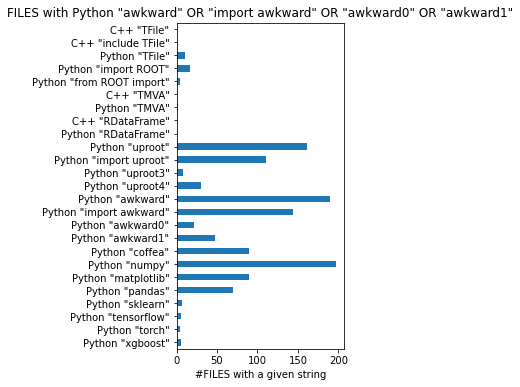

In [33]:
ax = plot_single(search_df, ["Python \"awkward\"", "Python \"import awkward\"", "Python \"awkward0\"", "Python \"awkward1\""], "FILES")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-awkward-byfile.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-awkward-byfile.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-awkward-byfile.png")

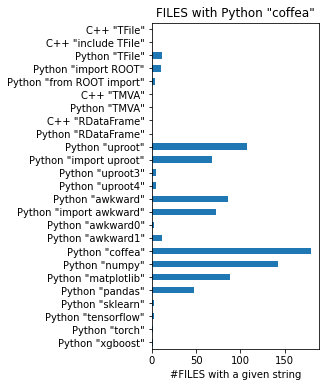

In [34]:
ax = plot_single(search_df, ["Python \"coffea\""], "FILES")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-coffea-byfile.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-coffea-byfile.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-coffea-byfile.png")

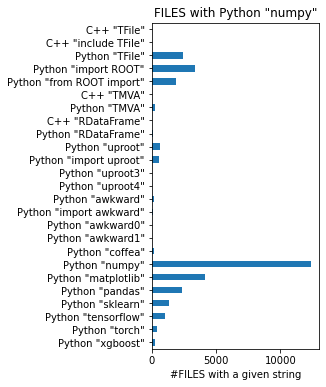

In [35]:
ax = plot_single(search_df, ["Python \"numpy\""], "FILES")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-numpy-byfile.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-numpy-byfile.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-numpy-byfile.png")

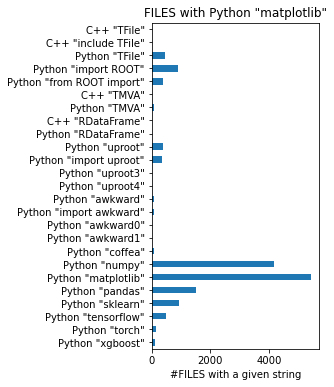

In [36]:
ax = plot_single(search_df, ["Python \"matplotlib\""], "FILES")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-matplotlib-byfile.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-matplotlib-byfile.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-matplotlib-byfile.png")

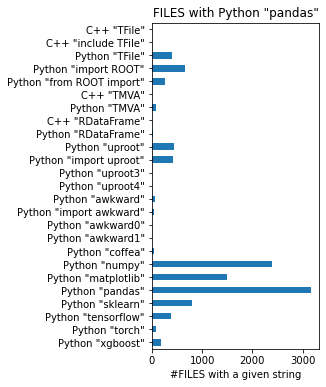

In [37]:
ax = plot_single(search_df, ["Python \"pandas\""], "FILES")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-pandas-byfile.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-pandas-byfile.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-pandas-byfile.png")

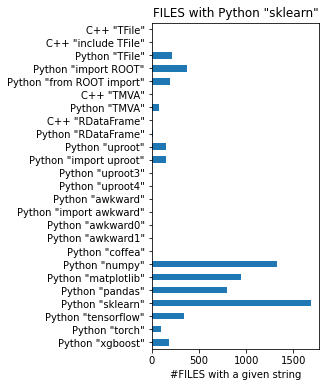

In [38]:
ax = plot_single(search_df, ["Python \"sklearn\""], "FILES")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-sklearn-byfile.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-sklearn-byfile.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-sklearn-byfile.png")

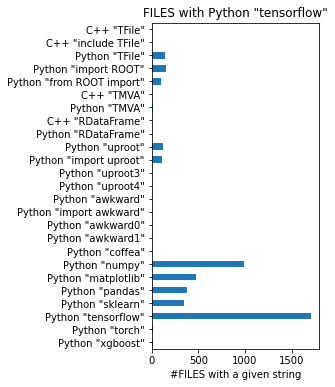

In [39]:
ax = plot_single(search_df, ["Python \"tensorflow\""], "FILES")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-tensorflow-byfile.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-tensorflow-byfile.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-tensorflow-byfile.png")

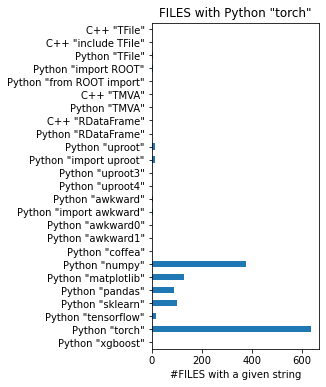

In [40]:
ax = plot_single(search_df, ["Python \"torch\""], "FILES")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-torch-byfile.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-torch-byfile.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-torch-byfile.png")

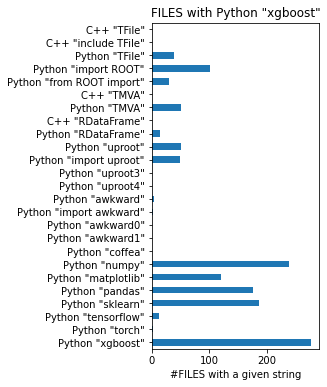

In [41]:
ax = plot_single(search_df, ["Python \"xgboost\""], "FILES")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-xgboost-byfile.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-xgboost-byfile.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-xgboost-byfile.png")

In [42]:
search_dfs_byrepo = []
search_dfs_byrepo.append(get_search_for_correlation("cpp-tfile", "C++ \"TFile\"", byrepo=True))
search_dfs_byrepo.append(get_search_for_correlation("cpp-include-tfile", "C++ \"include TFile\"", byrepo=True))
search_dfs_byrepo.append(get_search_for_correlation("python-tfile", "Python \"TFile\"", byrepo=True))
search_dfs_byrepo.append(get_search_for_correlation("python-import-root", "Python \"import ROOT\"", byrepo=True))
search_dfs_byrepo.append(get_search_for_correlation("python-from-root-import", "Python \"from ROOT import\"", byrepo=True))
search_dfs_byrepo.append(get_search_for_correlation("cpp-tmva", "C++ \"TMVA\"", byrepo=True))
search_dfs_byrepo.append(get_search_for_correlation("python-tmva", "Python \"TMVA\"", byrepo=True))
search_dfs_byrepo.append(get_search_for_correlation("cpp-rdataframe", "C++ \"RDataFrame\"", byrepo=True))
search_dfs_byrepo.append(get_search_for_correlation("python-rdataframe", "Python \"RDataFrame\"", byrepo=True))
search_dfs_byrepo.append(get_search_for_correlation("python-uproot", "Python \"uproot\"", byrepo=True))
search_dfs_byrepo.append(get_search_for_correlation("python-import-uproot", "Python \"import uproot\"", byrepo=True))
search_dfs_byrepo.append(get_search_for_correlation("python-uproot3", "Python \"uproot3\"", byrepo=True))
search_dfs_byrepo.append(get_search_for_correlation("python-uproot4", "Python \"uproot4\"", byrepo=True))
search_dfs_byrepo.append(get_search_for_correlation("python-awkward", "Python \"awkward\"", byrepo=True))
search_dfs_byrepo.append(get_search_for_correlation("python-import-awkward", "Python \"import awkward\"", byrepo=True))
search_dfs_byrepo.append(get_search_for_correlation("python-awkward0", "Python \"awkward0\"", byrepo=True))
search_dfs_byrepo.append(get_search_for_correlation("python-awkward1", "Python \"awkward1\"", byrepo=True))
search_dfs_byrepo.append(get_search_for_correlation("python-coffea", "Python \"coffea\"", byrepo=True))
search_dfs_byrepo.append(get_search_for_correlation("python-numpy", "Python \"numpy\"", byrepo=True))
search_dfs_byrepo.append(get_search_for_correlation("python-matplotlib", "Python \"matplotlib\"", byrepo=True))
search_dfs_byrepo.append(get_search_for_correlation("python-pandas", "Python \"pandas\"", byrepo=True))
search_dfs_byrepo.append(get_search_for_correlation("python-sklearn", "Python \"sklearn\"", byrepo=True))
search_dfs_byrepo.append(get_search_for_correlation("python-tensorflow", "Python \"tensorflow\"", byrepo=True))
search_dfs_byrepo.append(get_search_for_correlation("python-torch", "Python \"torch\"", byrepo=True))
search_dfs_byrepo.append(get_search_for_correlation("python-xgboost", "Python \"xgboost\"", byrepo=True))

In [43]:
search_df_byrepo = None
for df in search_dfs_byrepo:
    if search_df_byrepo is None:
        search_df_byrepo = df
    else:
        search_df_byrepo = pd.merge(search_df_byrepo, df, how="outer", left_index=True, right_index=True)

search_df_byrepo.fillna(False, inplace=True)

In [44]:
correlation_byrepo = search_df_byrepo.corr(lambda x, y: (x * y).sum() / len(x))
correlation_byrepo

,"C++ ""TFile""","C++ ""include TFile""","Python ""TFile""","Python ""import ROOT""","Python ""from ROOT import""","C++ ""TMVA""","Python ""TMVA""","C++ ""RDataFrame""","Python ""RDataFrame""","Python ""uproot""",...,"Python ""awkward0""","Python ""awkward1""","Python ""coffea""","Python ""numpy""","Python ""matplotlib""","Python ""pandas""","Python ""sklearn""","Python ""tensorflow""","Python ""torch""","Python ""xgboost"""
"C++ ""TFile""",1.000000,0.536130,0.400775,0.274938,0.230878,0.134649,0.085301,0.004935,0.008812,0.024321,...,0.000705,0.001410,0.001762,0.192809,0.092351,0.055340,0.041593,0.024674,0.003172,0.017272
"C++ ""include TFile""",0.536130,1.000000,0.342263,0.248502,0.211139,0.129362,0.081424,0.004582,0.007402,0.021149,...,0.000705,0.001057,0.001410,0.175890,0.083539,0.049348,0.038068,0.021502,0.002467,0.016567
"Python ""TFile""",0.400775,0.342263,1.000000,0.363765,0.279521,0.113148,0.097638,0.010222,0.017977,0.037363,...,0.001410,0.003525,0.004230,0.246387,0.113853,0.076489,0.055693,0.035249,0.005640,0.020444
"Python ""import ROOT""",0.274938,0.248502,0.363765,1.000000,0.238632,0.093056,0.086711,0.009870,0.021149,0.040536,...,0.001410,0.003525,0.003877,0.250264,0.122665,0.082481,0.059570,0.034544,0.005287,0.022207
"Python ""from ROOT import""",0.230878,0.211139,0.279521,0.238632,1.000000,0.084596,0.078252,0.002115,0.006345,0.022912,...,0.000705,0.001057,0.001762,0.181882,0.084949,0.054283,0.044413,0.023264,0.003172,0.017624
"C++ ""TMVA""",0.134649,0.129362,0.113148,0.093056,0.084596,1.000000,0.071202,0.000000,0.002820,0.008812,...,0.000000,0.000000,0.000000,0.064505,0.038068,0.023264,0.026084,0.009870,0.000352,0.014804
"Python ""TMVA""",0.085301,0.081424,0.097638,0.086711,0.078252,0.071202,1.000000,0.000352,0.003877,0.011984,...,0.000000,0.000000,0.001057,0.072964,0.046176,0.029256,0.034896,0.015862,0.001410,0.018682
"C++ ""RDataFrame""",0.004935,0.004582,0.010222,0.009870,0.002115,0.000000,0.000352,1.000000,0.007402,0.000705,...,0.000000,0.000352,0.000352,0.004582,0.002467,0.002115,0.000352,0.001410,0.000000,0.000000
"Python ""RDataFrame""",0.008812,0.007402,0.017977,0.021149,0.006345,0.002820,0.003877,0.007402,1.000000,0.003172,...,0.000000,0.000352,0.000705,0.012337,0.007050,0.004582,0.004230,0.001762,0.000000,0.002820
"Python ""uproot""",0.024321,0.021149,0.037363,0.040536,0.022912,0.008812,0.011984,0.000705,0.003172,1.000000,...,0.002820,0.004935,0.008460,0.059922,0.047585,0.044061,0.028904,0.021854,0.005992,0.012337


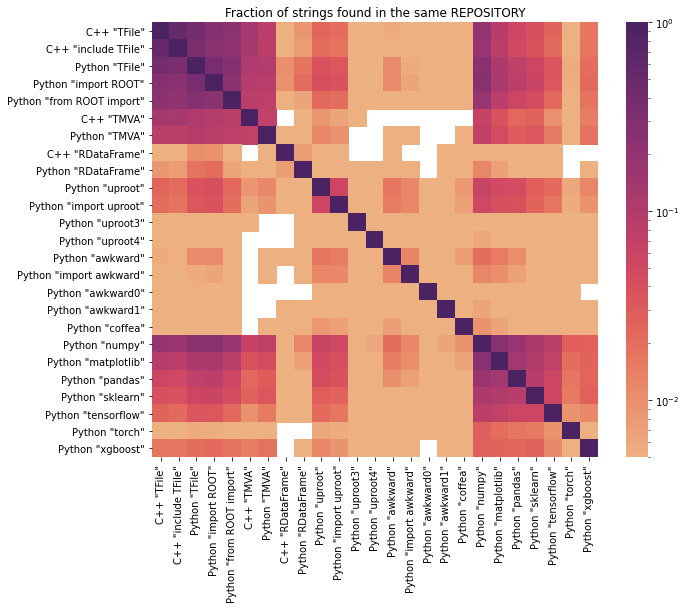

In [45]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    correlation_byrepo,
    xticklabels=correlation_byrepo.columns,
    yticklabels=correlation_byrepo.columns,
    norm=matplotlib.colors.LogNorm(0.005, 1),
    cmap=sns.color_palette("flare", as_cmap=True),
)
ax.set_title("Fraction of strings found in the same REPOSITORY")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-matrix-byrepo.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-matrix-byrepo.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-matrix-byrepo.png")

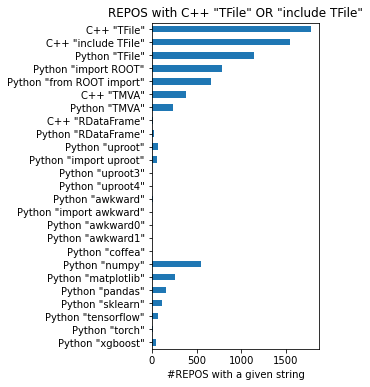

In [46]:
ax = plot_single(search_df_byrepo, ["C++ \"TFile\"", "C++ \"include TFile\""], "REPOS")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-cpp-tfile-byrepo.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-cpp-tfile-byrepo.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-cpp-tfile-byrepo.png")

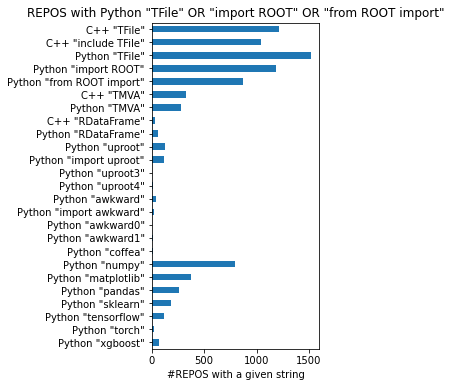

In [47]:
ax = plot_single(search_df_byrepo, ["Python \"TFile\"", "Python \"import ROOT\"", "Python \"from ROOT import\""], "REPOS")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-root-byrepo.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-root-byrepo.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-root-byrepo.png")

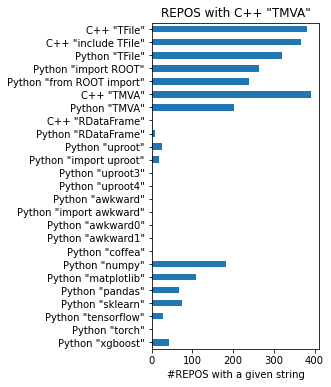

In [48]:
ax = plot_single(search_df_byrepo, ["C++ \"TMVA\""], "REPOS")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-cpp-tmva-byrepo.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-cpp-tmva-byrepo.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-cpp-tmva-byrepo.png")

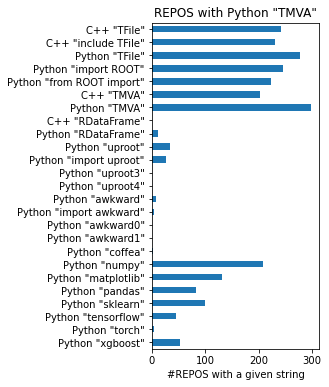

In [49]:
ax = plot_single(search_df_byrepo, ["Python \"TMVA\""], "REPOS")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-tmva-byrepo.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-tmva-byrepo.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-tmva-byrepo.png")

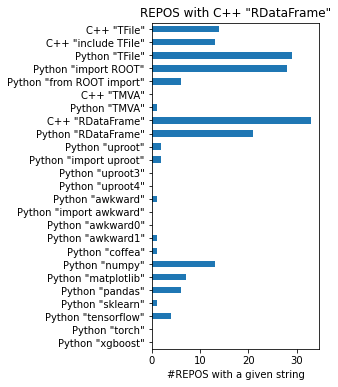

In [50]:
ax = plot_single(search_df_byrepo, ["C++ \"RDataFrame\""], "REPOS")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-cpp-rdataframe-byrepo.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-cpp-rdataframe-byrepo.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-cpp-rdataframe-byrepo.png")

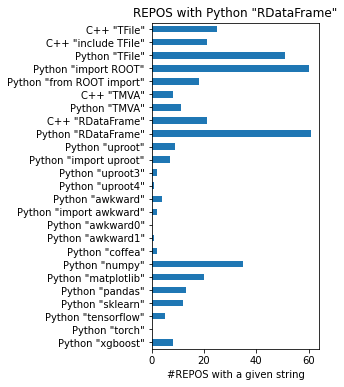

In [51]:
ax = plot_single(search_df_byrepo, ["Python \"RDataFrame\""], "REPOS")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-rdataframe-byrepo.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-rdataframe-byrepo.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-rdataframe-byrepo.png")

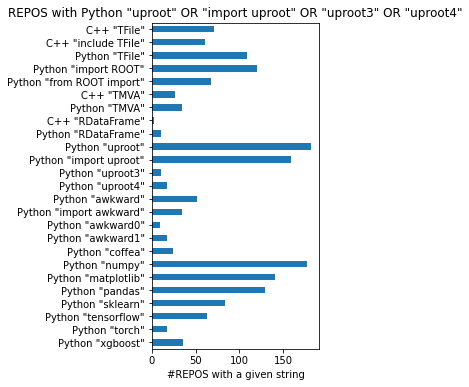

In [52]:
ax = plot_single(search_df_byrepo, ["Python \"uproot\"", "Python \"import uproot\"", "Python \"uproot3\"", "Python \"uproot4\""], "REPOS")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-uproot-byrepo.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-uproot-byrepo.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-uproot-byrepo.png")

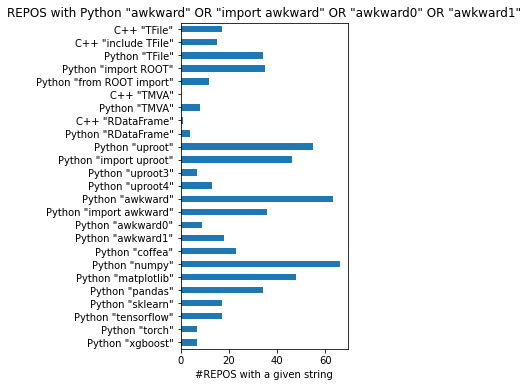

In [53]:
ax = plot_single(search_df_byrepo, ["Python \"awkward\"", "Python \"import awkward\"", "Python \"awkward0\"", "Python \"awkward1\""], "REPOS")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-awkward-byrepo.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-awkward-byrepo.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-awkward-byrepo.png")

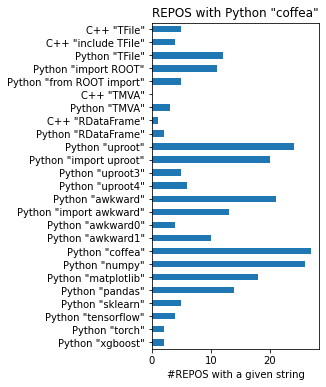

In [54]:
ax = plot_single(search_df_byrepo, ["Python \"coffea\""], "REPOS")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-coffea-byrepo.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-coffea-byrepo.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-coffea-byrepo.png")

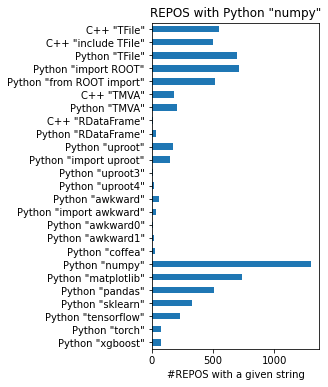

In [55]:
ax = plot_single(search_df_byrepo, ["Python \"numpy\""], "REPOS")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-numpy-byrepo.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-numpy-byrepo.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-numpy-byrepo.png")

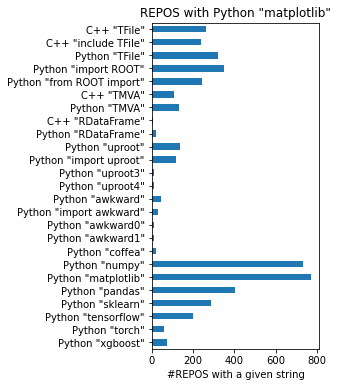

In [56]:
ax = plot_single(search_df_byrepo, ["Python \"matplotlib\""], "REPOS")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-matplotlib-byrepo.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-matplotlib-byrepo.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-matplotlib-byrepo.png")

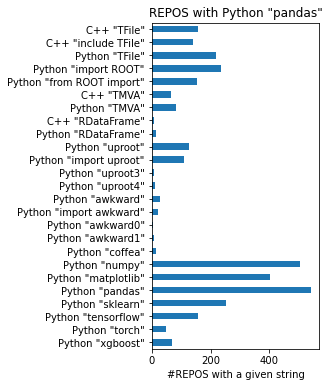

In [57]:
ax = plot_single(search_df_byrepo, ["Python \"pandas\""], "REPOS")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-pandas-byrepo.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-pandas-byrepo.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-pandas-byrepo.png")

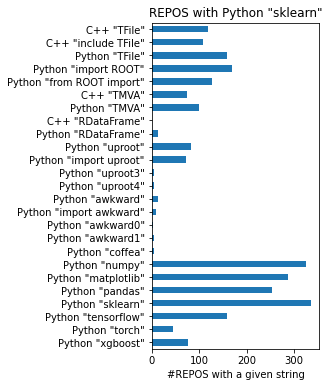

In [58]:
ax = plot_single(search_df_byrepo, ["Python \"sklearn\""], "REPOS")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-sklearn-byrepo.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-sklearn-byrepo.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-sklearn-byrepo.png")

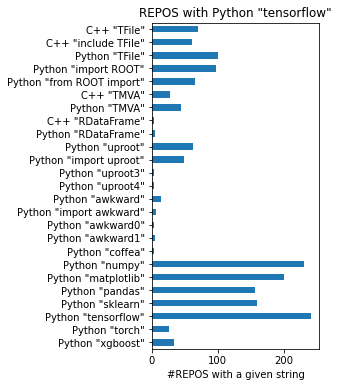

In [59]:
ax = plot_single(search_df_byrepo, ["Python \"tensorflow\""], "REPOS")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-tensorflow-byrepo.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-tensorflow-byrepo.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-tensorflow-byrepo.png")

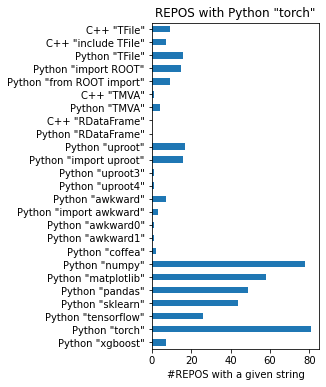

In [60]:
ax = plot_single(search_df_byrepo, ["Python \"torch\""], "REPOS")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-torch-byrepo.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-torch-byrepo.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-torch-byrepo.png")

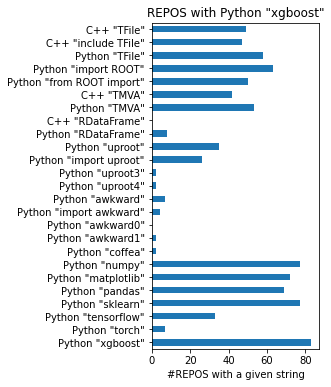

In [61]:
ax = plot_single(search_df_byrepo, ["Python \"xgboost\""], "REPOS")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-xgboost-byrepo.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-xgboost-byrepo.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-xgboost-byrepo.png")

In [62]:
search_dfs = []
search_dfs.append(get_search_for_correlation("cpp-tfile", "C++ \"TFile\"", since="2019-01-01"))
search_dfs.append(get_search_for_correlation("cpp-include-tfile", "C++ \"include TFile\"", since="2019-01-01"))
search_dfs.append(get_search_for_correlation("python-tfile", "Python \"TFile\"", since="2019-01-01"))
search_dfs.append(get_search_for_correlation("python-import-root", "Python \"import ROOT\"", since="2019-01-01"))
search_dfs.append(get_search_for_correlation("python-from-root-import", "Python \"from ROOT import\"", since="2019-01-01"))
search_dfs.append(get_search_for_correlation("cpp-tmva", "C++ \"TMVA\"", since="2019-01-01"))
search_dfs.append(get_search_for_correlation("python-tmva", "Python \"TMVA\"", since="2019-01-01"))
search_dfs.append(get_search_for_correlation("cpp-rdataframe", "C++ \"RDataFrame\"", since="2019-01-01"))
search_dfs.append(get_search_for_correlation("python-rdataframe", "Python \"RDataFrame\"", since="2019-01-01"))
search_dfs.append(get_search_for_correlation("python-uproot", "Python \"uproot\"", since="2019-01-01"))
search_dfs.append(get_search_for_correlation("python-import-uproot", "Python \"import uproot\"", since="2019-01-01"))
search_dfs.append(get_search_for_correlation("python-uproot3", "Python \"uproot3\"", since="2019-01-01"))
search_dfs.append(get_search_for_correlation("python-uproot4", "Python \"uproot4\"", since="2019-01-01"))
search_dfs.append(get_search_for_correlation("python-awkward", "Python \"awkward\"", since="2019-01-01"))
search_dfs.append(get_search_for_correlation("python-import-awkward", "Python \"import awkward\"", since="2019-01-01"))
search_dfs.append(get_search_for_correlation("python-awkward0", "Python \"awkward0\"", since="2019-01-01"))
search_dfs.append(get_search_for_correlation("python-awkward1", "Python \"awkward1\"", since="2019-01-01"))
search_dfs.append(get_search_for_correlation("python-coffea", "Python \"coffea\"", since="2019-01-01"))
search_dfs.append(get_search_for_correlation("python-numpy", "Python \"numpy\"", since="2019-01-01"))
search_dfs.append(get_search_for_correlation("python-matplotlib", "Python \"matplotlib\"", since="2019-01-01"))
search_dfs.append(get_search_for_correlation("python-pandas", "Python \"pandas\"", since="2019-01-01"))
search_dfs.append(get_search_for_correlation("python-sklearn", "Python \"sklearn\"", since="2019-01-01"))
search_dfs.append(get_search_for_correlation("python-tensorflow", "Python \"tensorflow\"", since="2019-01-01"))
search_dfs.append(get_search_for_correlation("python-torch", "Python \"torch\"", since="2019-01-01"))
search_dfs.append(get_search_for_correlation("python-xgboost", "Python \"xgboost\"", since="2019-01-01"))

In [63]:
search_df = None
for df in search_dfs:
    if search_df is None:
        search_df = df
    else:
        search_df = pd.merge(search_df, df, how="outer", left_index=True, right_index=True)

search_df.fillna(False, inplace=True)

In [64]:
correlation = search_df.corr(lambda x, y: (x * y).sum() / len(x))
correlation

,"C++ ""TFile""","C++ ""include TFile""","Python ""TFile""","Python ""import ROOT""","Python ""from ROOT import""","C++ ""TMVA""","Python ""TMVA""","C++ ""RDataFrame""","Python ""RDataFrame""","Python ""uproot""",...,"Python ""awkward0""","Python ""awkward1""","Python ""coffea""","Python ""numpy""","Python ""matplotlib""","Python ""pandas""","Python ""sklearn""","Python ""tensorflow""","Python ""torch""","Python ""xgboost"""
"C++ ""TFile""",1.000000,0.141507,0.000000,0.000000,0.000000,0.009695,0.000000,0.000241,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"C++ ""include TFile""",0.141507,1.000000,0.000000,0.000000,0.000000,0.006237,0.000000,0.000197,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"Python ""TFile""",0.000000,0.000000,1.000000,0.071563,0.048584,0.000000,0.002692,0.000000,0.001663,0.002473,...,0.000022,0.000044,0.000241,0.022541,0.005887,0.005821,0.002145,0.001401,0.000066,0.000372
"Python ""import ROOT""",0.000000,0.000000,0.071563,1.000000,0.042413,0.000000,0.002188,0.000000,0.002626,0.003655,...,0.000000,0.000022,0.000219,0.033265,0.009826,0.009213,0.004311,0.001795,0.000088,0.001313
"Python ""from ROOT import""",0.000000,0.000000,0.048584,0.042413,1.000000,0.000000,0.002364,0.000000,0.000744,0.000832,...,0.000000,0.000000,0.000088,0.016742,0.004246,0.003874,0.001663,0.000985,0.000000,0.000372
"C++ ""TMVA""",0.009695,0.006237,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"Python ""TMVA""",0.000000,0.000000,0.002692,0.002188,0.002364,0.000000,1.000000,0.000000,0.000219,0.000306,...,0.000000,0.000000,0.000000,0.002385,0.000985,0.000941,0.000875,0.000066,0.000000,0.000678
"C++ ""RDataFrame""",0.000241,0.000197,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"Python ""RDataFrame""",0.000000,0.000000,0.001663,0.002626,0.000744,0.000000,0.000219,0.000000,1.000000,0.000219,...,0.000000,0.000000,0.000000,0.000985,0.000263,0.000438,0.000285,0.000000,0.000000,0.000306
"Python ""uproot""",0.000000,0.000000,0.002473,0.003655,0.000832,0.000000,0.000306,0.000000,0.000219,1.000000,...,0.000350,0.000591,0.002320,0.012409,0.007463,0.008185,0.003130,0.002167,0.000175,0.001029


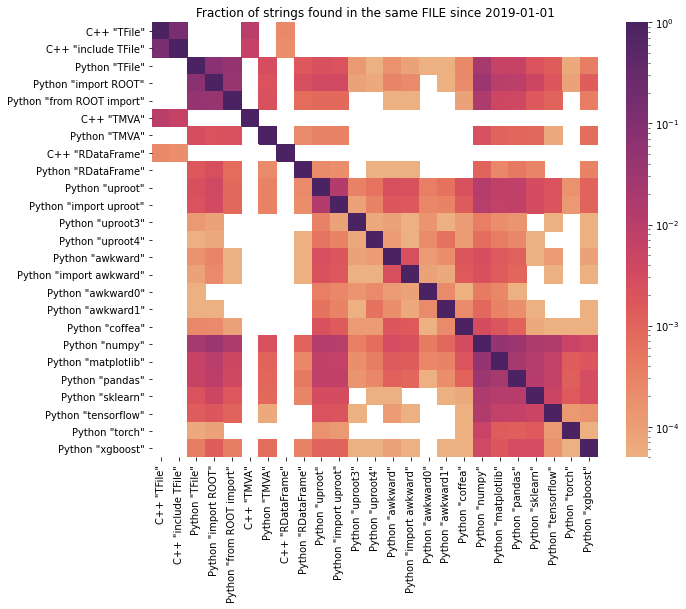

In [65]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    correlation,
    xticklabels=correlation.columns,
    yticklabels=correlation.columns,
    norm=matplotlib.colors.LogNorm(0.00005, 1),
    cmap=sns.color_palette("flare", as_cmap=True),
)
ax.set_title("Fraction of strings found in the same FILE since 2019-01-01")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-matrix-byfile-since2019.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-matrix-byfile-since2019.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-matrix-byfile-since2019.png")

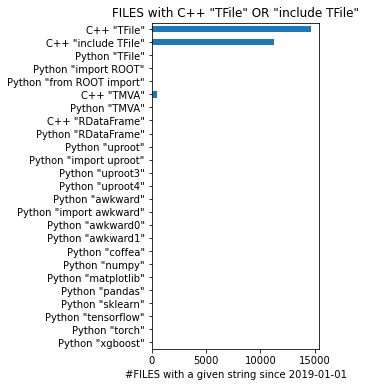

In [66]:
ax = plot_single(search_df, ["C++ \"TFile\"", "C++ \"include TFile\""], "FILES", since="2019-01-01")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-cpp-tfile-byfile-since2019.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-cpp-tfile-byfile-since2019.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-cpp-tfile-byfile-since2019.png")

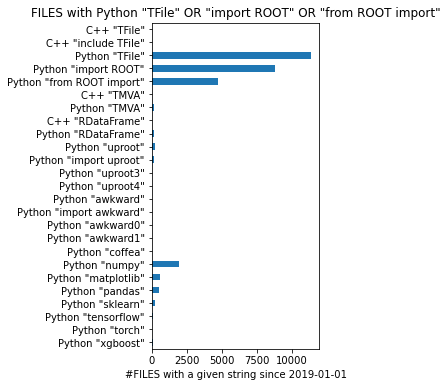

In [67]:
ax = plot_single(search_df, ["Python \"TFile\"", "Python \"import ROOT\"", "Python \"from ROOT import\""], "FILES", since="2019-01-01")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-root-byfile-since2019.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-root-byfile-since2019.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-root-byfile-since2019.png")

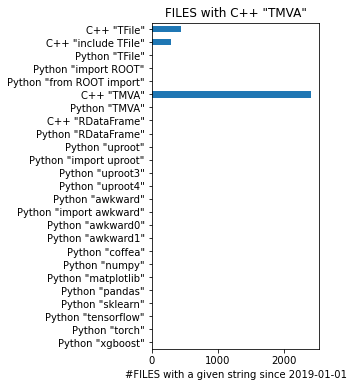

In [68]:
ax = plot_single(search_df, ["C++ \"TMVA\""], "FILES", since="2019-01-01")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-cpp-tmva-byfile-since2019.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-cpp-tmva-byfile-since2019.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-cpp-tmva-byfile-since2019.png")

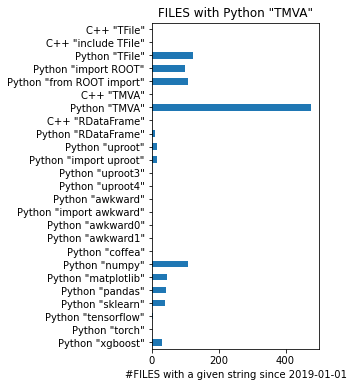

In [69]:
ax = plot_single(search_df, ["Python \"TMVA\""], "FILES", since="2019-01-01")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-tmva-byfile-since2019.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-tmva-byfile-since2019.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-tmva-byfile-since2019.png")

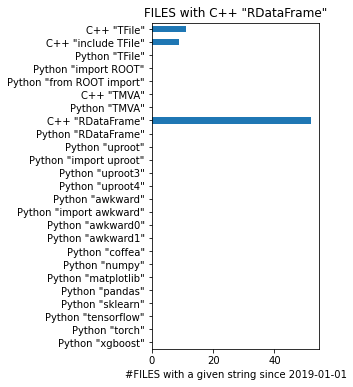

In [70]:
ax = plot_single(search_df, ["C++ \"RDataFrame\""], "FILES", since="2019-01-01")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-cpp-rdataframe-byfile-since2019.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-cpp-rdataframe-byfile-since2019.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-cpp-rdataframe-byfile-since2019.png")

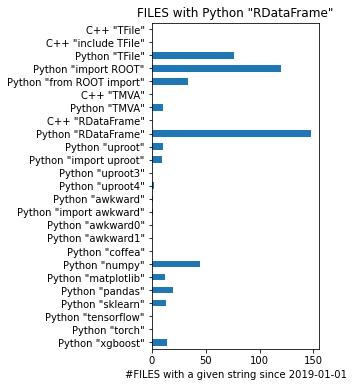

In [71]:
ax = plot_single(search_df, ["Python \"RDataFrame\""], "FILES", since="2019-01-01")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-rdataframe-byfile-since2019.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-rdataframe-byfile-since2019.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-rdataframe-byfile-since2019.png")

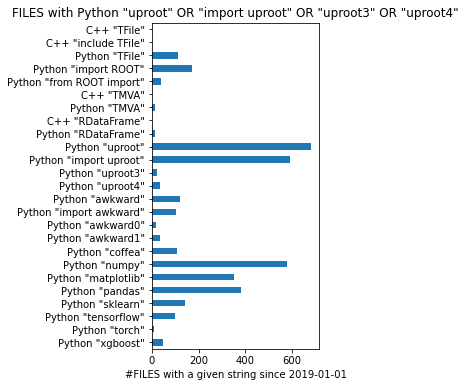

In [72]:
ax = plot_single(search_df, ["Python \"uproot\"", "Python \"import uproot\"", "Python \"uproot3\"", "Python \"uproot4\""], "FILES", since="2019-01-01")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-uproot-byfile-since2019.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-uproot-byfile-since2019.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-uproot-byfile-since2019.png")

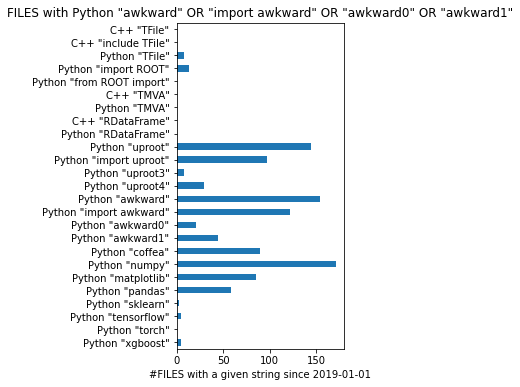

In [73]:
ax = plot_single(search_df, ["Python \"awkward\"", "Python \"import awkward\"", "Python \"awkward0\"", "Python \"awkward1\""], "FILES", since="2019-01-01")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-awkward-byfile-since2019.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-awkward-byfile-since2019.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-awkward-byfile-since2019.png")

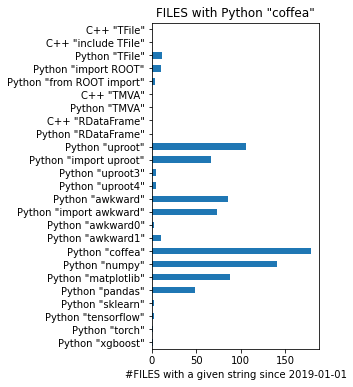

In [74]:
ax = plot_single(search_df, ["Python \"coffea\""], "FILES", since="2019-01-01")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-coffea-byfile-since2019.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-coffea-byfile-since2019.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-coffea-byfile-since2019.png")

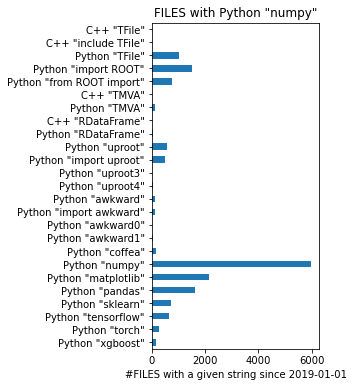

In [75]:
ax = plot_single(search_df, ["Python \"numpy\""], "FILES", since="2019-01-01")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-numpy-byfile-since2019.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-numpy-byfile-since2019.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-numpy-byfile-since2019.png")

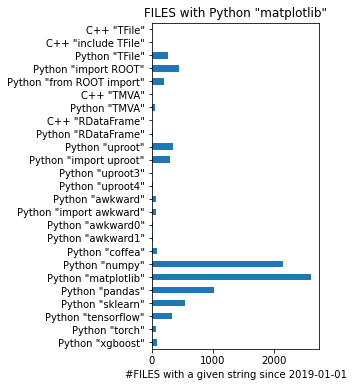

In [76]:
ax = plot_single(search_df, ["Python \"matplotlib\""], "FILES", since="2019-01-01")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-matplotlib-byfile-since2019.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-matplotlib-byfile-since2019.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-matplotlib-byfile-since2019.png")

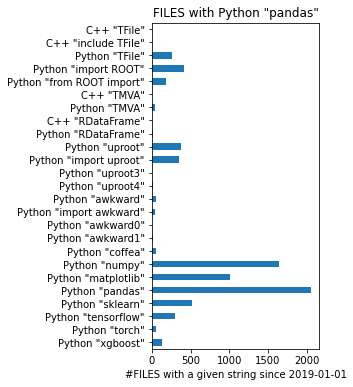

In [77]:
ax = plot_single(search_df, ["Python \"pandas\""], "FILES", since="2019-01-01")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-pandas-byfile-since2019.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-pandas-byfile-since2019.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-pandas-byfile-since2019.png")

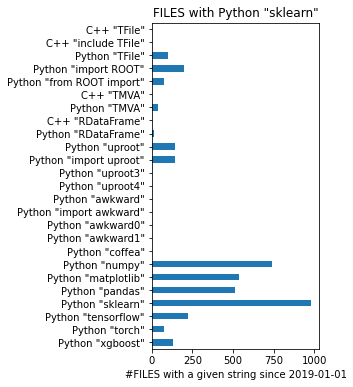

In [78]:
ax = plot_single(search_df, ["Python \"sklearn\""], "FILES", since="2019-01-01")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-sklearn-byfile-since2019.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-sklearn-byfile-since2019.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-sklearn-byfile-since2019.png")

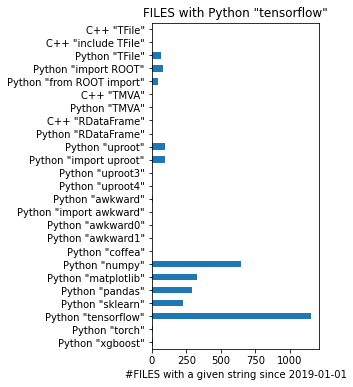

In [79]:
ax = plot_single(search_df, ["Python \"tensorflow\""], "FILES", since="2019-01-01")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-tensorflow-byfile-since2019.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-tensorflow-byfile-since2019.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-tensorflow-byfile-since2019.png")

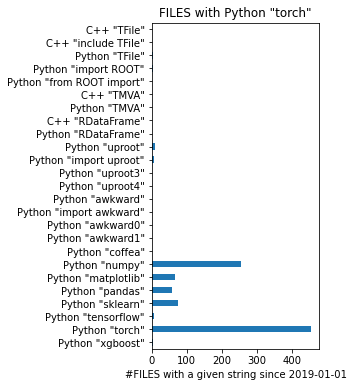

In [80]:
ax = plot_single(search_df, ["Python \"torch\""], "FILES", since="2019-01-01")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-torch-byfile-since2019.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-torch-byfile-since2019.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-torch-byfile-since2019.png")

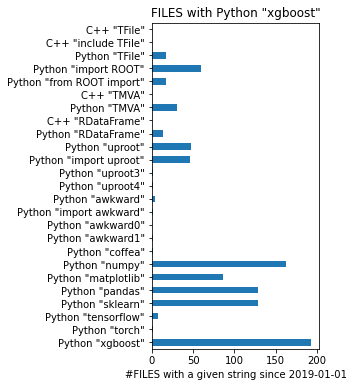

In [81]:
ax = plot_single(search_df, ["Python \"xgboost\""], "FILES", since="2019-01-01")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-xgboost-byfile-since2019.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-xgboost-byfile-since2019.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-xgboost-byfile-since2019.png")

In [82]:
search_dfs_byrepo = []
search_dfs_byrepo.append(get_search_for_correlation("cpp-tfile", "C++ \"TFile\"", byrepo=True, since="2019-01-01"))
search_dfs_byrepo.append(get_search_for_correlation("cpp-include-tfile", "C++ \"include TFile\"", byrepo=True, since="2019-01-01"))
search_dfs_byrepo.append(get_search_for_correlation("python-tfile", "Python \"TFile\"", byrepo=True, since="2019-01-01"))
search_dfs_byrepo.append(get_search_for_correlation("python-import-root", "Python \"import ROOT\"", byrepo=True, since="2019-01-01"))
search_dfs_byrepo.append(get_search_for_correlation("python-from-root-import", "Python \"from ROOT import\"", byrepo=True, since="2019-01-01"))
search_dfs_byrepo.append(get_search_for_correlation("cpp-tmva", "C++ \"TMVA\"", byrepo=True, since="2019-01-01"))
search_dfs_byrepo.append(get_search_for_correlation("python-tmva", "Python \"TMVA\"", byrepo=True, since="2019-01-01"))
search_dfs_byrepo.append(get_search_for_correlation("cpp-rdataframe", "C++ \"RDataFrame\"", byrepo=True, since="2019-01-01"))
search_dfs_byrepo.append(get_search_for_correlation("python-rdataframe", "Python \"RDataFrame\"", byrepo=True, since="2019-01-01"))
search_dfs_byrepo.append(get_search_for_correlation("python-uproot", "Python \"uproot\"", byrepo=True, since="2019-01-01"))
search_dfs_byrepo.append(get_search_for_correlation("python-import-uproot", "Python \"import uproot\"", byrepo=True, since="2019-01-01"))
search_dfs_byrepo.append(get_search_for_correlation("python-uproot3", "Python \"uproot3\"", byrepo=True, since="2019-01-01"))
search_dfs_byrepo.append(get_search_for_correlation("python-uproot4", "Python \"uproot4\"", byrepo=True, since="2019-01-01"))
search_dfs_byrepo.append(get_search_for_correlation("python-awkward", "Python \"awkward\"", byrepo=True, since="2019-01-01"))
search_dfs_byrepo.append(get_search_for_correlation("python-import-awkward", "Python \"import awkward\"", byrepo=True, since="2019-01-01"))
search_dfs_byrepo.append(get_search_for_correlation("python-awkward0", "Python \"awkward0\"", byrepo=True, since="2019-01-01"))
search_dfs_byrepo.append(get_search_for_correlation("python-awkward1", "Python \"awkward1\"", byrepo=True, since="2019-01-01"))
search_dfs_byrepo.append(get_search_for_correlation("python-coffea", "Python \"coffea\"", byrepo=True, since="2019-01-01"))
search_dfs_byrepo.append(get_search_for_correlation("python-numpy", "Python \"numpy\"", byrepo=True, since="2019-01-01"))
search_dfs_byrepo.append(get_search_for_correlation("python-matplotlib", "Python \"matplotlib\"", byrepo=True, since="2019-01-01"))
search_dfs_byrepo.append(get_search_for_correlation("python-pandas", "Python \"pandas\"", byrepo=True, since="2019-01-01"))
search_dfs_byrepo.append(get_search_for_correlation("python-sklearn", "Python \"sklearn\"", byrepo=True, since="2019-01-01"))
search_dfs_byrepo.append(get_search_for_correlation("python-tensorflow", "Python \"tensorflow\"", byrepo=True, since="2019-01-01"))
search_dfs_byrepo.append(get_search_for_correlation("python-torch", "Python \"torch\"", byrepo=True, since="2019-01-01"))
search_dfs_byrepo.append(get_search_for_correlation("python-xgboost", "Python \"xgboost\"", byrepo=True, since="2019-01-01"))

In [83]:
search_df_byrepo = None
for df in search_dfs_byrepo:
    if search_df_byrepo is None:
        search_df_byrepo = df
    else:
        search_df_byrepo = pd.merge(search_df_byrepo, df, how="outer", left_index=True, right_index=True)

search_df_byrepo.fillna(False, inplace=True)

In [84]:
correlation_byrepo = search_df_byrepo.corr(lambda x, y: (x * y).sum() / len(x))
correlation_byrepo

,"C++ ""TFile""","C++ ""include TFile""","Python ""TFile""","Python ""import ROOT""","Python ""from ROOT import""","C++ ""TMVA""","Python ""TMVA""","C++ ""RDataFrame""","Python ""RDataFrame""","Python ""uproot""",...,"Python ""awkward0""","Python ""awkward1""","Python ""coffea""","Python ""numpy""","Python ""matplotlib""","Python ""pandas""","Python ""sklearn""","Python ""tensorflow""","Python ""torch""","Python ""xgboost"""
"C++ ""TFile""",1.000000,0.382726,0.283677,0.200475,0.145008,0.080824,0.045959,0.006339,0.014263,0.045166,...,0.001585,0.002377,0.003962,0.161648,0.082409,0.070523,0.045959,0.032488,0.004754,0.025357
"C++ ""include TFile""",0.382726,1.000000,0.223455,0.172742,0.130745,0.078447,0.043582,0.005547,0.011886,0.038827,...,0.001585,0.002377,0.003170,0.141046,0.073693,0.060222,0.040412,0.027734,0.003962,0.023772
"Python ""TFile""",0.283677,0.223455,1.000000,0.326466,0.205230,0.063391,0.061807,0.017433,0.033281,0.072108,...,0.003170,0.007132,0.009509,0.241680,0.118859,0.106181,0.065769,0.052298,0.007924,0.030111
"Python ""import ROOT""",0.200475,0.172742,0.326466,1.000000,0.179873,0.057052,0.054675,0.016640,0.040412,0.077655,...,0.003170,0.007132,0.008716,0.254358,0.133914,0.115689,0.074485,0.051506,0.008716,0.034865
"Python ""from ROOT import""",0.145008,0.130745,0.205230,0.179873,1.000000,0.045166,0.050713,0.002377,0.011886,0.042789,...,0.001585,0.001585,0.003962,0.163233,0.081616,0.072108,0.051506,0.034865,0.004754,0.026941
"C++ ""TMVA""",0.080824,0.078447,0.063391,0.057052,0.045166,1.000000,0.038035,0.000000,0.005547,0.016640,...,0.000000,0.000000,0.000000,0.045959,0.025357,0.026941,0.025357,0.012678,0.000792,0.022187
"Python ""TMVA""",0.045959,0.043582,0.061807,0.054675,0.050713,0.038035,1.000000,0.000000,0.006339,0.021395,...,0.000000,0.000000,0.002377,0.056260,0.036450,0.033281,0.038035,0.021395,0.002377,0.026941
"C++ ""RDataFrame""",0.006339,0.005547,0.017433,0.016640,0.002377,0.000000,0.000000,1.000000,0.014263,0.001585,...,0.000000,0.000792,0.000792,0.004754,0.002377,0.001585,0.000000,0.002377,0.000000,0.000000
"Python ""RDataFrame""",0.014263,0.011886,0.033281,0.040412,0.011886,0.005547,0.006339,0.014263,1.000000,0.006339,...,0.000000,0.000792,0.001585,0.020602,0.011094,0.006339,0.007132,0.002377,0.000000,0.005547
"Python ""uproot""",0.045166,0.038827,0.072108,0.077655,0.042789,0.016640,0.021395,0.001585,0.006339,1.000000,...,0.006339,0.010301,0.018225,0.116482,0.091125,0.083994,0.053090,0.041997,0.010301,0.026149


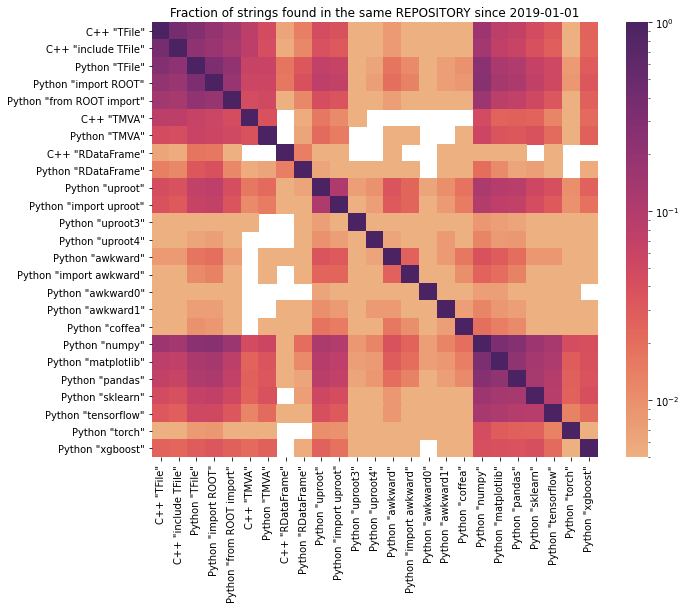

In [85]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    correlation_byrepo,
    xticklabels=correlation_byrepo.columns,
    yticklabels=correlation_byrepo.columns,
    norm=matplotlib.colors.LogNorm(0.005, 1),
    cmap=sns.color_palette("flare", as_cmap=True),
)
ax.set_title("Fraction of strings found in the same REPOSITORY since 2019-01-01")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-matrix-byrepo-since2019.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-matrix-byrepo-since2019.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-matrix-byrepo-since2019.png")

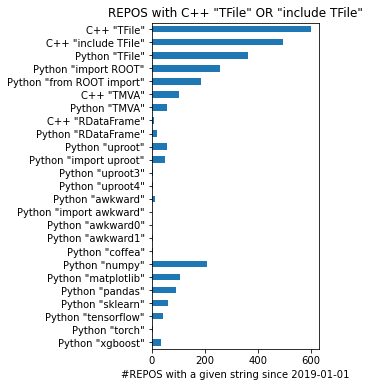

In [86]:
ax = plot_single(search_df_byrepo, ["C++ \"TFile\"", "C++ \"include TFile\""], "REPOS", since="2019-01-01")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-cpp-tfile-byrepo-since2019.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-cpp-tfile-byrepo-since2019.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-cpp-tfile-byrepo-since2019.png")

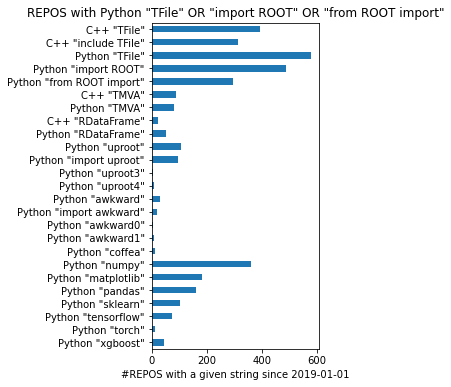

In [87]:
ax = plot_single(search_df_byrepo, ["Python \"TFile\"", "Python \"import ROOT\"", "Python \"from ROOT import\""], "REPOS", since="2019-01-01")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-root-byrepo-since2019.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-root-byrepo-since2019.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-root-byrepo-since2019.png")

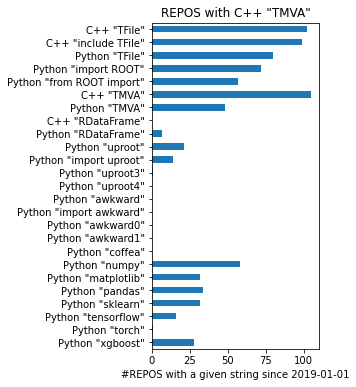

In [88]:
ax = plot_single(search_df_byrepo, ["C++ \"TMVA\""], "REPOS", since="2019-01-01")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-cpp-tmva-byrepo-since2019.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-cpp-tmva-byrepo-since2019.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-cpp-tmva-byrepo-since2019.png")

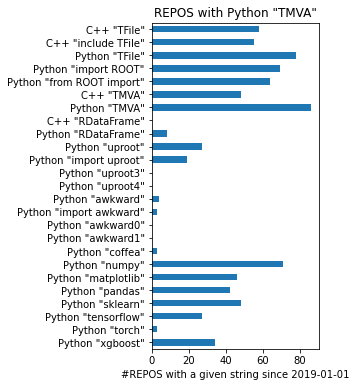

In [89]:
ax = plot_single(search_df_byrepo, ["Python \"TMVA\""], "REPOS", since="2019-01-01")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-tmva-byrepo-since2019.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-tmva-byrepo-since2019.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-tmva-byrepo-since2019.png")

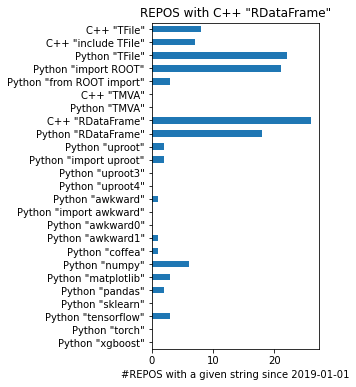

In [90]:
ax = plot_single(search_df_byrepo, ["C++ \"RDataFrame\""], "REPOS", since="2019-01-01")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-cpp-rdataframe-byrepo-since2019.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-cpp-rdataframe-byrepo-since2019.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-cpp-rdataframe-byrepo-since2019.png")

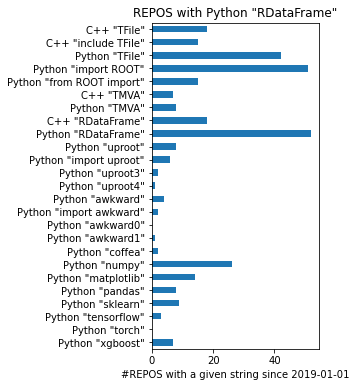

In [91]:
ax = plot_single(search_df_byrepo, ["Python \"RDataFrame\""], "REPOS", since="2019-01-01")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-rdataframe-byrepo-since2019.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-rdataframe-byrepo-since2019.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-rdataframe-byrepo-since2019.png")

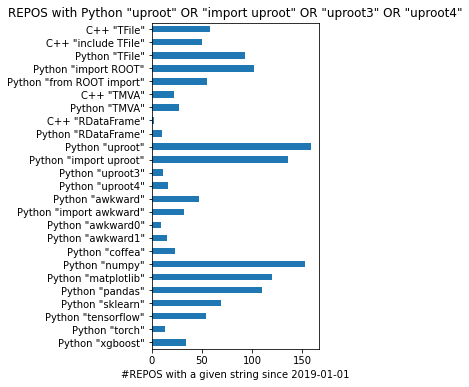

In [92]:
ax = plot_single(search_df_byrepo, ["Python \"uproot\"", "Python \"import uproot\"", "Python \"uproot3\"", "Python \"uproot4\""], "REPOS", since="2019-01-01")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-uproot-byrepo-since2019.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-uproot-byrepo-since2019.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-uproot-byrepo-since2019.png")

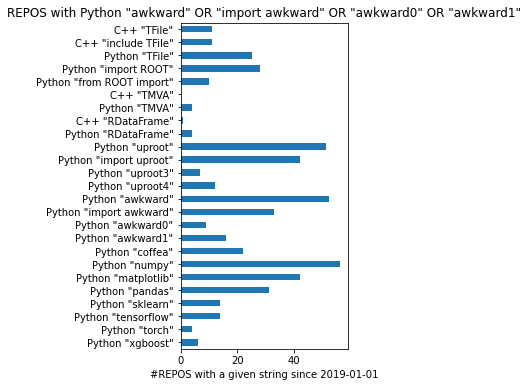

In [93]:
ax = plot_single(search_df_byrepo, ["Python \"awkward\"", "Python \"import awkward\"", "Python \"awkward0\"", "Python \"awkward1\""], "REPOS", since="2019-01-01")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-awkward-byrepo-since2019.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-awkward-byrepo-since2019.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-awkward-byrepo-since2019.png")

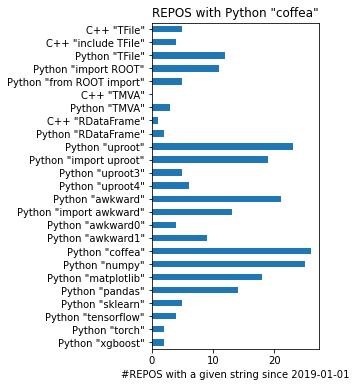

In [94]:
ax = plot_single(search_df_byrepo, ["Python \"coffea\""], "REPOS", since="2019-01-01")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-coffea-byrepo-since2019.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-coffea-byrepo-since2019.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-coffea-byrepo-since2019.png")

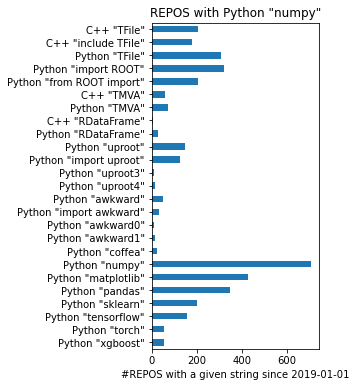

In [95]:
ax = plot_single(search_df_byrepo, ["Python \"numpy\""], "REPOS", since="2019-01-01")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-numpy-byrepo-since2019.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-numpy-byrepo-since2019.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-numpy-byrepo-since2019.png")

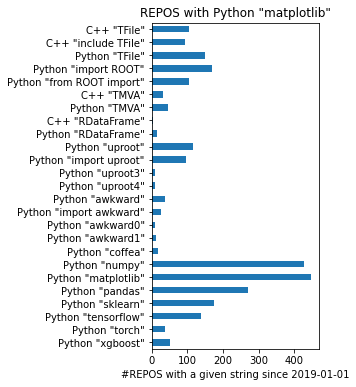

In [96]:
ax = plot_single(search_df_byrepo, ["Python \"matplotlib\""], "REPOS", since="2019-01-01")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-matplotlib-byrepo-since2019.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-matplotlib-byrepo-since2019.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-matplotlib-byrepo-since2019.png")

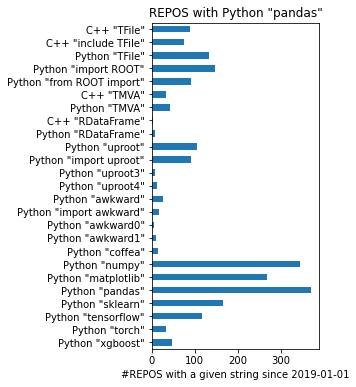

In [97]:
ax = plot_single(search_df_byrepo, ["Python \"pandas\""], "REPOS", since="2019-01-01")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-pandas-byrepo-since2019.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-pandas-byrepo-since2019.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-pandas-byrepo-since2019.png")

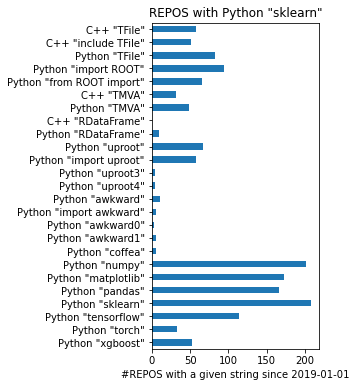

In [98]:
ax = plot_single(search_df_byrepo, ["Python \"sklearn\""], "REPOS", since="2019-01-01")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-sklearn-byrepo-since2019.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-sklearn-byrepo-since2019.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-sklearn-byrepo-since2019.png")

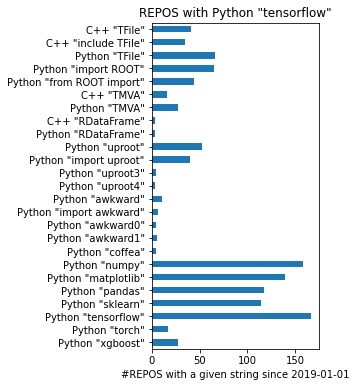

In [99]:
ax = plot_single(search_df_byrepo, ["Python \"tensorflow\""], "REPOS", since="2019-01-01")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-tensorflow-byrepo-since2019.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-tensorflow-byrepo-since2019.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-tensorflow-byrepo-since2019.png")

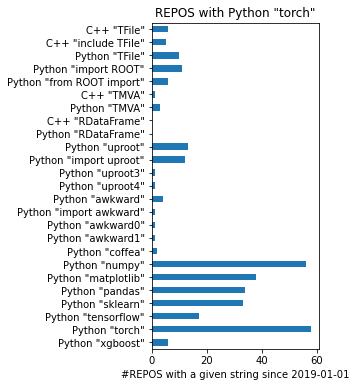

In [100]:
ax = plot_single(search_df_byrepo, ["Python \"torch\""], "REPOS", since="2019-01-01")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-torch-byrepo-since2019.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-torch-byrepo-since2019.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-torch-byrepo-since2019.png")

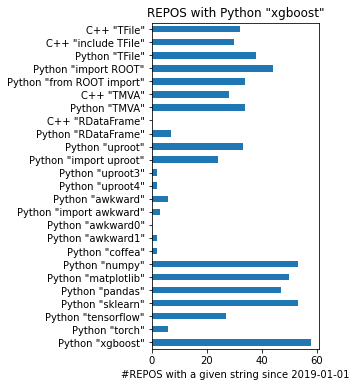

In [101]:
ax = plot_single(search_df_byrepo, ["Python \"xgboost\""], "REPOS", since="2019-01-01")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-xgboost-byrepo-since2019.svg")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-xgboost-byrepo-since2019.pdf")
ax.get_figure().savefig("PLOTS-github/gihub-search-correlation-python-xgboost-byrepo-since2019.png")